<a href="https://colab.research.google.com/github/Shreyaa86/Rock-vs-Mine-prediction/blob/main/Sonar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
import plotly.express as px

In [ ]:
sonar_data = pd.read_csv('Copy of sonar data.csv', header=None)

In [ ]:
sonar_data.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.134416  ...    0.012008   
min      0.003300    0.005500    0.007500    0.011300  ...    0.000000   
25%      0.080900    0.080425    0.097025    0.111275  ...    0.008425   
50%      0.106950    0.112100    0.152250    0.182400  ...    0.013900   
75%      0.154000    0.169600    0.233425    0.268700  ...    0.020825   
max      0.372900    0.459000    0.682800    0.710600  ...    0.100400   

               51          52          53          54          55          56  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.013420    0.010709    0.010941    0.009290    0.008222    0.007820   
std      0.009634    0.007060    0.007301    0.007088    0.005736    0.005785   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007275    0.005075    0.005375    0.004150    0.004400    0.003700   
50%      0.011400    0.009550    0.009300    0.007500    0.006850    0.005950   
75%      0.016725    0.014900    0.014500    0.012100    0.010575    0.010425   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

               57          58          59  
count  208.000000  208.000000  208.000000  
mean     0.007949    0.007941    0.006507  
std      0.006470    0.006181    0.005031  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003675    0.003100  
50%      0.005800    0.006400    0.005300  
75%      0.010350    0.010325    0.008525  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

In [ ]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
#checking value counts for last column
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
#checking mean for last column with each column
sonar_data.groupby(60).mean()

0         1         2         3         4         5         6   \
60                                                                         
M   0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R   0.022498  0.030303  0.035951  0.041447  0.062028  0.096224  0.114180   

          7         8         9   ...        50        51        52        53  \
60                                ...                                           
M   0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R   0.117596  0.137392  0.159325  ...  0.012311  0.010453  0.009640  0.009518   

          54        55        56        57        58        59  
60                                                              
M   0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R   0.008567  0.007430  0.007814  0.006677  0.007078  0.006024  

[2 rows x 60 columns]

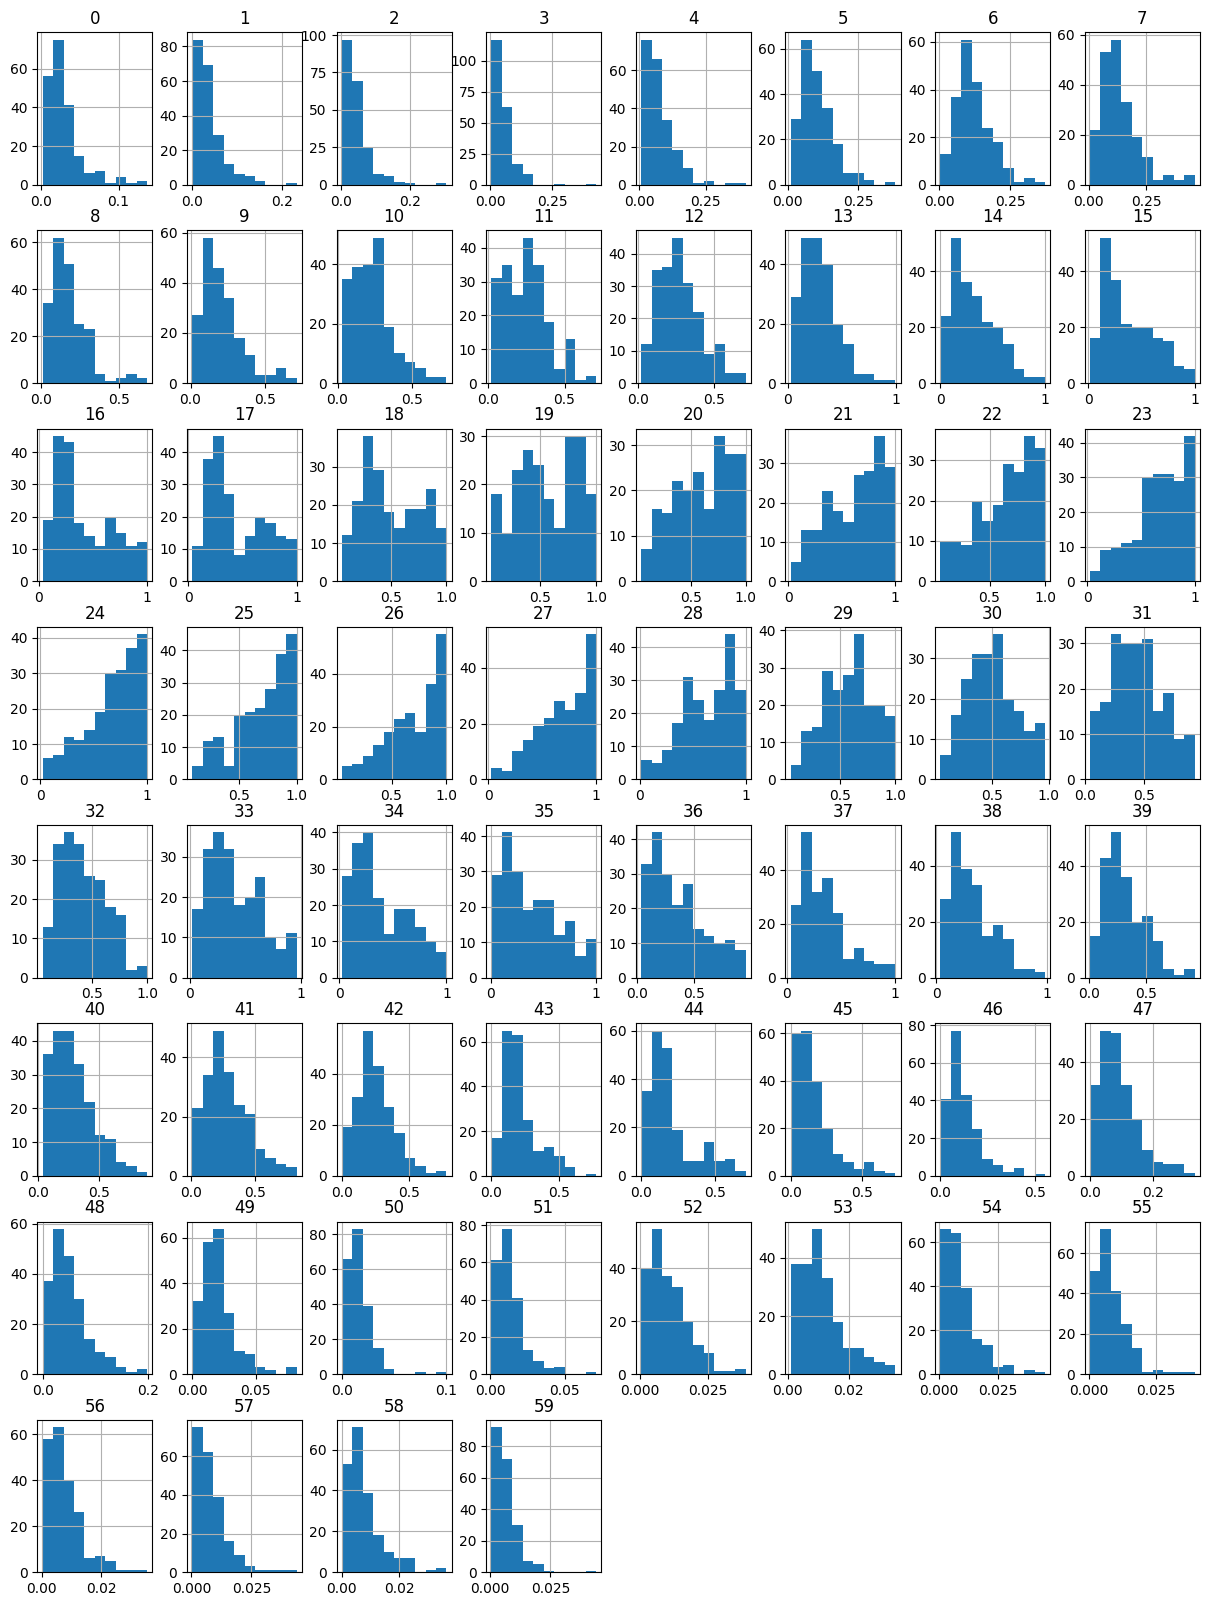

In [ ]:
sonar_data.hist(sharex = False, sharey = False, figsize=(15,20))
plt.show()

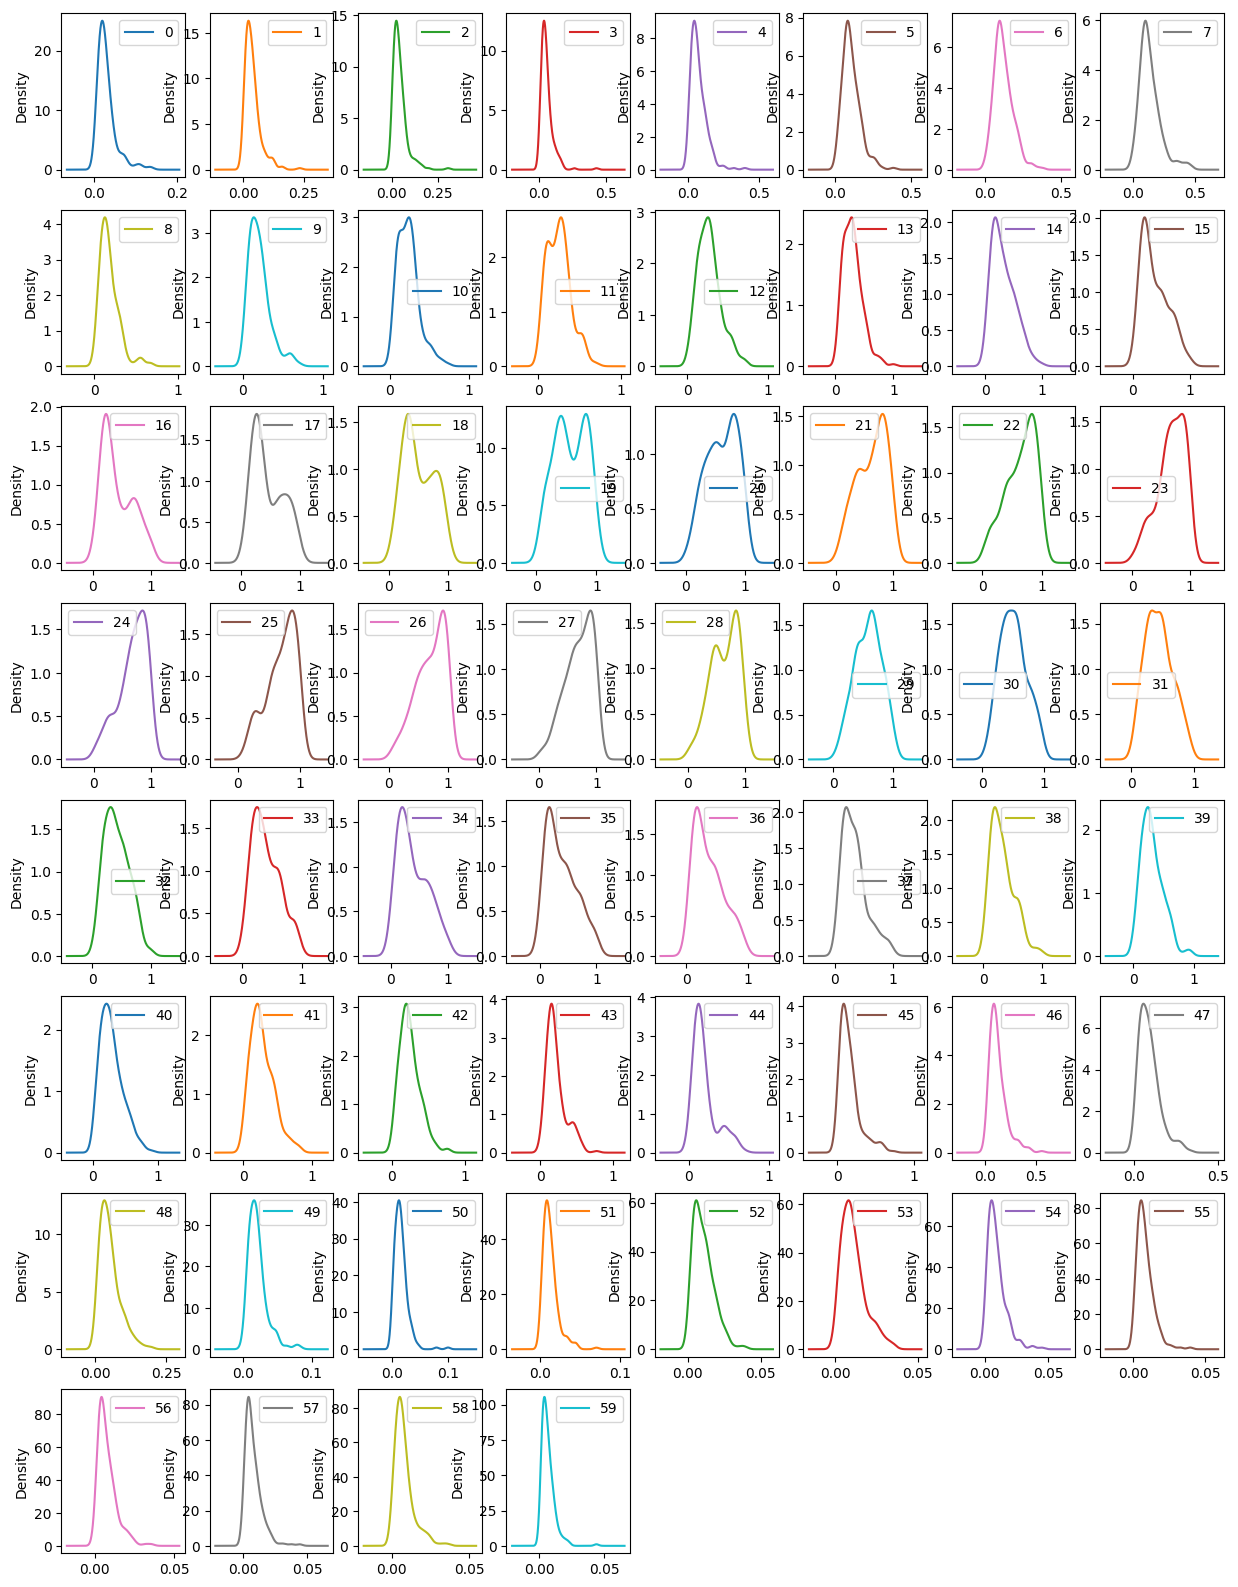

In [ ]:
sonar_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(15,20))
plt.show()

In [ ]:
#checking null values
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<Axes: >

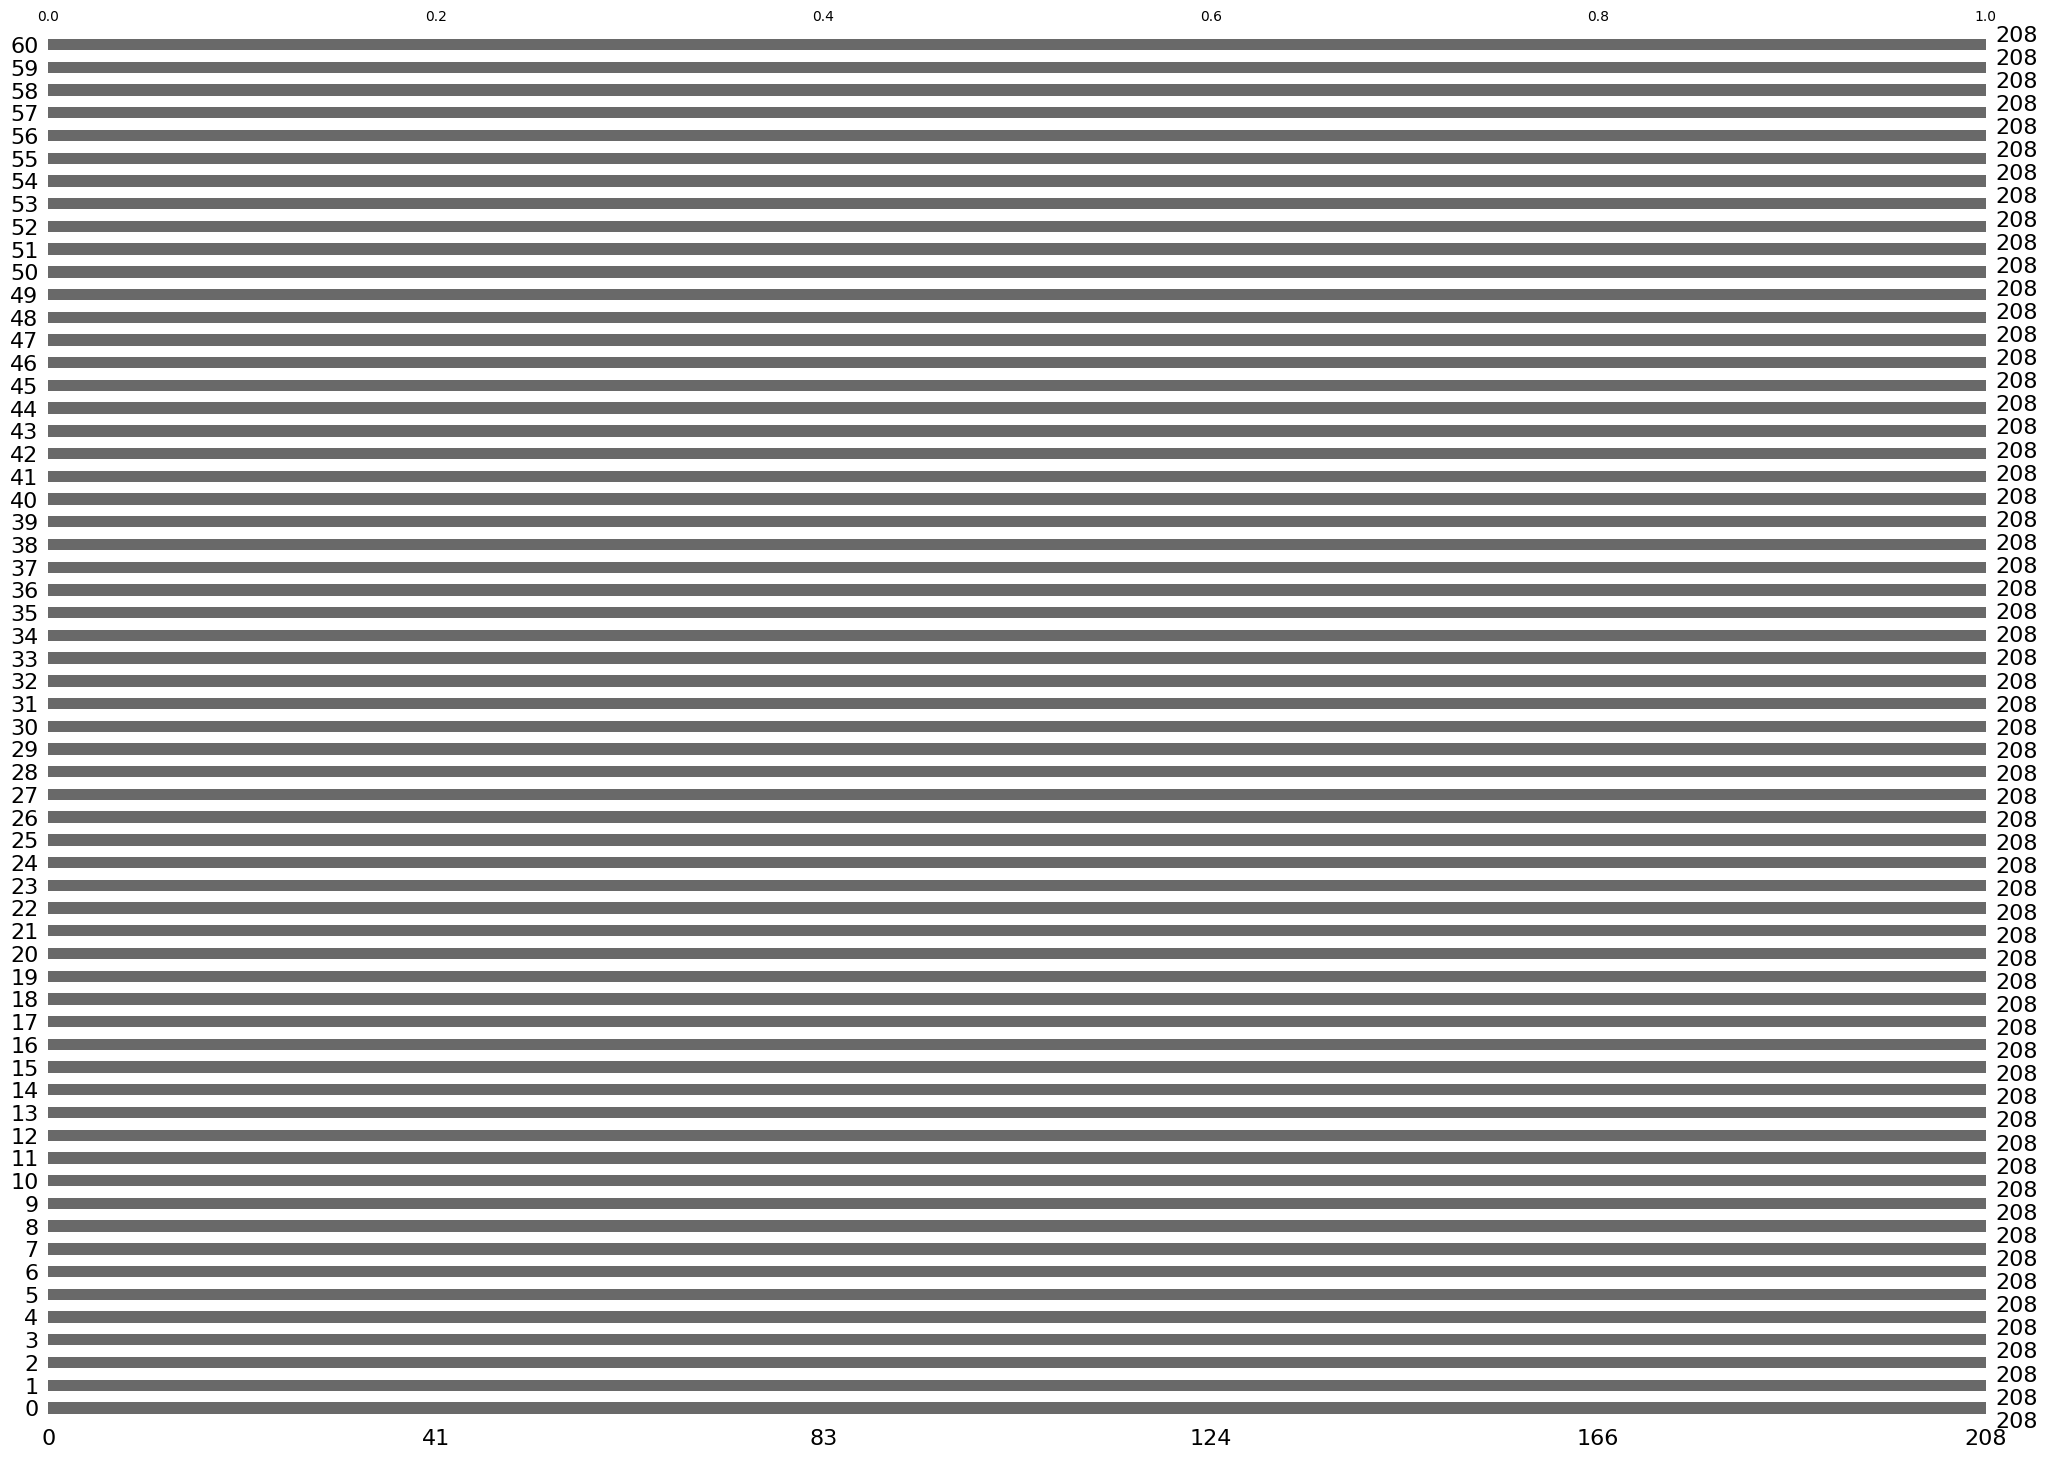

In [ ]:
msno.bar(sonar_data)

<Axes: >

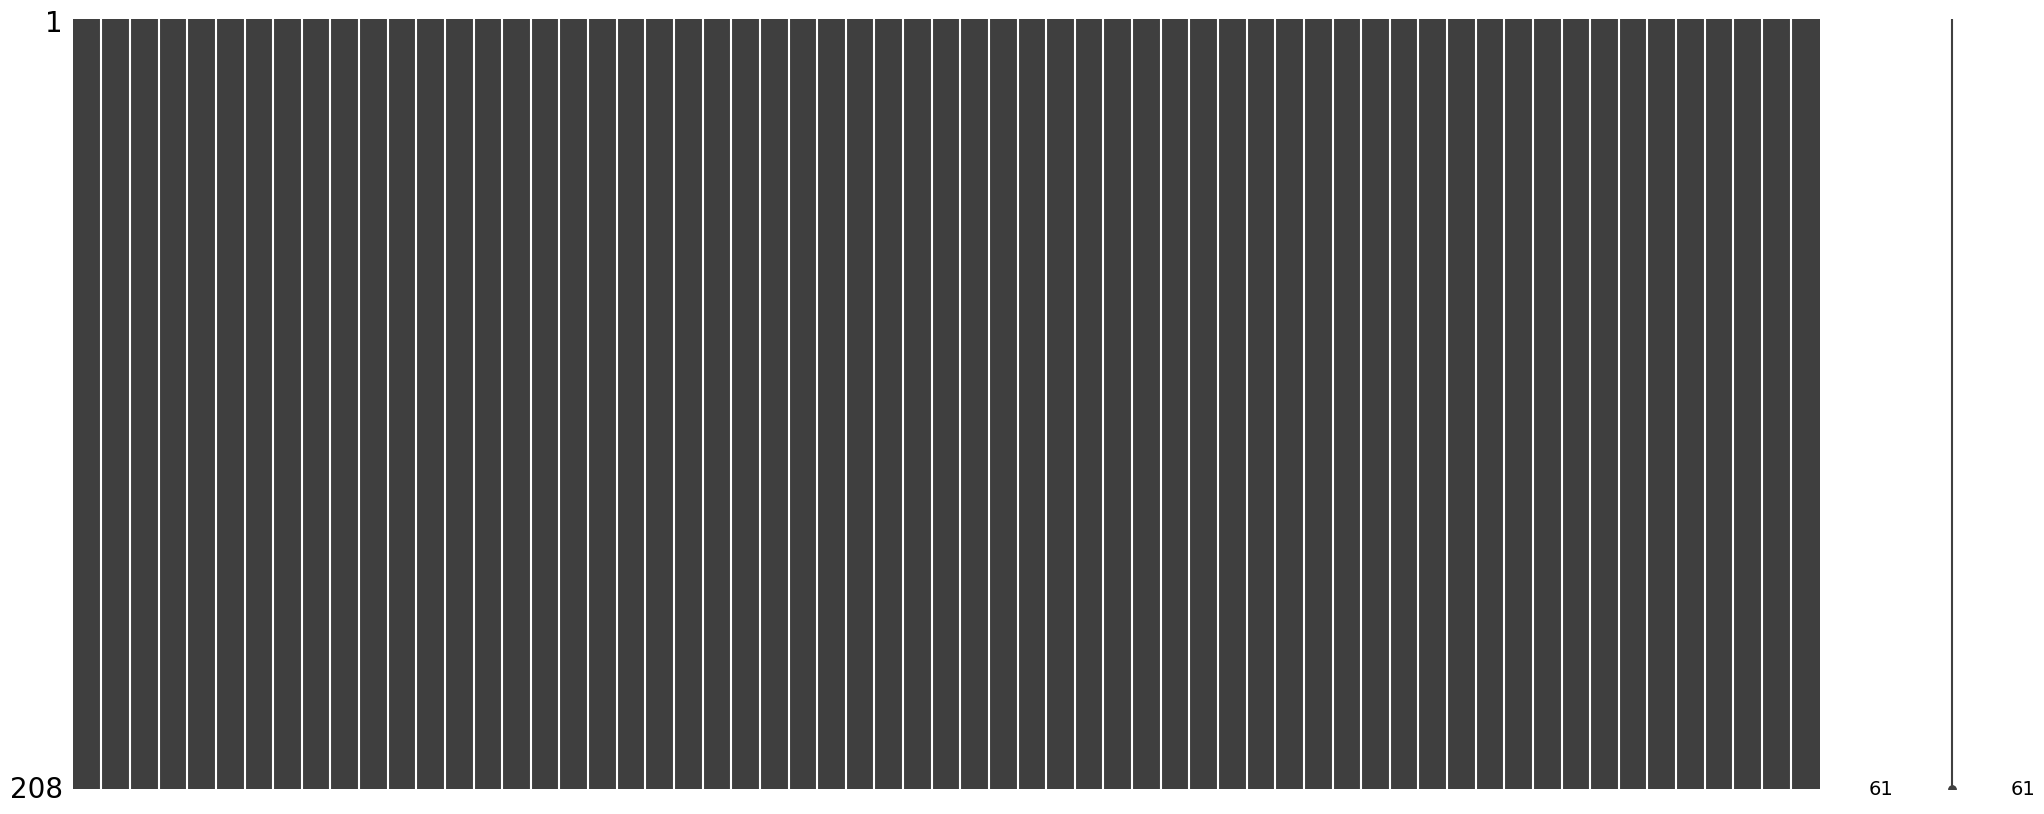

In [ ]:
msno.matrix(sonar_data)

In [ ]:
# Convert the last column (column index 60) to numerical data using Label Encoding.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the unique values in the last column
le.fit(sonar_data[60])

# Transform the last column to numerical values
sonar_data[60] = le.transform(sonar_data[60])



In [ ]:
# Now calculate the correlation
sonar_data.corr()

0         1         2         3         4         5         6   \
0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
..       ...       ...       ...       ...       ...       ...       ...   
56  0.313725  0.280341  0.380819  0.340254  0.219395  0.161333  0.186324   
57  0.368132  0.353042  0.334108  0.344865  0.238793  0.203986  0.242646   
58  0.357116  0.352200  0.425047  0.420266  0.290982  0.220573  0.183578   
59  0.347078  0.358761  0.373948  0.400626  0.253710  0.178158  0.222493   
60 -0.271694 -0.231238 -0.192195 -0.250638 -0.222232 -0.132327 -0.114748   

          7         8         9   ...        51        52        53        54  \
0   0.355523  0.353420  0.318276  ...  0.355299  0.311729  0.322299  0.312067   
1   0.334615  0.316733  0.270782  ...  0.434548  0.346076  0.383960  0.380165   
2   0.237884  0.252691  0.219637  ...  0.394076  0.332914  0.367186  0.289731   
3   0.246742  0.247078  0.237769  ...  0.374651  0.364772  0.334211  0.284955   
4   0.204006  0.177906  0.183219  ...  0.266617  0.314985  0.205306  0.196472   
..       ...       ...       ...  ...       ...       ...       ...       ...   
56  0.267212  0.193963  0.140327  ...  0.191264  0.308197  0.361443  0.387204   
57  0.287603  0.231745  0.212277  ...  0.309673  0.370764  0.404117  0.503465   
58  0.194400  0.097293  0.058273  ...  0.298711  0.346095  0.447118  0.453658   
59  0.146216  0.095243  0.097358  ...  0.195379  0.280780  0.283471  0.264399   
60 -0.189314 -0.321448 -0.341142  ... -0.288651 -0.141871 -0.182687 -0.095639   

          55        56        57        58        59        60  
0   0.220642  0.313725  0.368132  0.357116  0.347078 -0.271694  
1   0.262263  0.280341  0.353042  0.352200  0.358761 -0.231238  
2   0.287661  0.380819  0.334108  0.425047  0.373948 -0.192195  
3   0.280938  0.340254  0.344865  0.420266  0.400626 -0.250638  
4   0.199323  0.219395  0.238793  0.290982  0.253710 -0.222232  
..       ...       ...       ...       ...       ...       ...  
56  0.515154  1.000000  0.509805  0.431295  0.287219 -0.000933  
57  0.463659  0.509805  1.000000  0.550235  0.329827 -0.184191  
58  0.430804  0.431295  0.550235  1.000000  0.642872 -0.130826  
59  0.349449  0.287219  0.329827  0.642872  1.000000 -0.090055  
60 -0.129341 -0.000933 -0.184191 -0.130826 -0.090055  1.000000  

[61 rows x 61 columns]

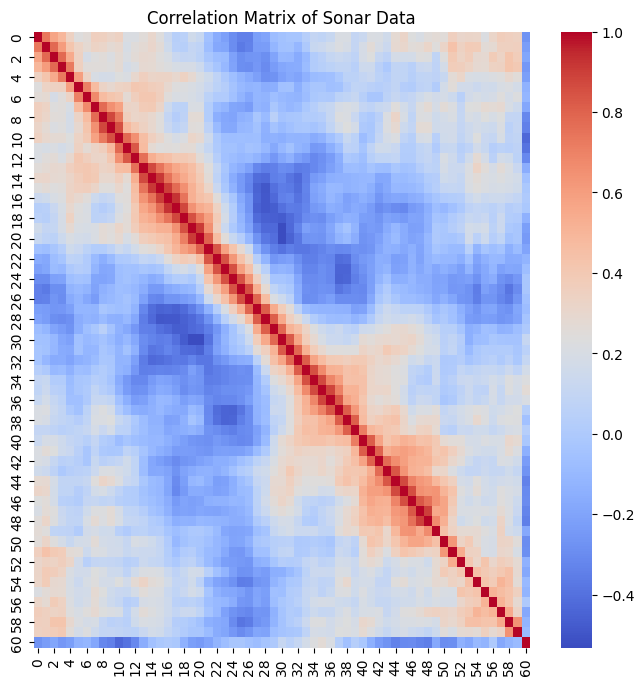

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(sonar_data.corr(), annot=False, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of Sonar Data')
plt.show()

In [ ]:
#finding highly correlated pairs
def find_highly_correlated_pairs(sonar_data, threshold=0.8):
    """
    Finds highly correlated pairs of features in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        threshold (float, optional): The correlation threshold. Defaults to 0.8.

    Returns:
        list: A list of tuples, where each tuple contains the names of two highly correlated features.
    """
    corr_matrix = sonar_data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    highly_correlated_pairs = [(col1, col2) for col1 in upper_triangle.columns for col2 in upper_triangle.index if upper_triangle.loc[col1, col2] > threshold]
    return highly_correlated_pairs

# Now you can call the function:
highly_correlated_features = find_highly_correlated_pairs(sonar_data, threshold=0.8)
print(highly_correlated_features)

[(8, 9), (9, 10), (11, 12), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (27, 28), (28, 29), (30, 31), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (40, 41), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48)]


In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sonar_data.values, i) for i in range(sonar_data.shape[1])]
vif["features"] = sonar_data.columns
print(vif.sort_values(by = 'VIF Factor', ascending=False).tail(10))

    VIF Factor  features
51    9.336711        51
55    8.584488        55
0     8.458742         0
52    7.981086        52
59    7.695340        59
54    7.540227        54
57    6.980156        57
56    6.670836        56
53    6.473434        53
60    4.345757        60


In [ ]:
#Separating data and labels
X = sonar_data.drop(columns=[60], axis=1)
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

TRAINING AND TEST DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [ ]:
X = sonar_data.drop(columns=[60])  # Features (excluding the target variable)
y = sonar_data[60]              # Target variable

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a PCA object. You can specify the number of components or the explained variance ratio you want to retain.
pca = PCA(n_components=0.95)  # Retain components explaining 95% of variance

# Fit PCA to the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
#Expalined variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.20346557 0.18897216 0.08549989 0.0567919  0.0500708  0.04064995
 0.03278992 0.03046466 0.02565961 0.02491102 0.0207528  0.0190199
 0.0174698  0.01538484 0.01427797 0.01360959 0.01234608 0.01168646
 0.01030774 0.00979002 0.00944079 0.00887561 0.00839874 0.00770838
 0.0072193  0.00696371 0.00615371 0.005316   0.00524715 0.00495397]


In [ ]:
#Cumulative Expalined variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

[0.20346557 0.39243773 0.47793762 0.53472952 0.58480032 0.62545027
 0.65824019 0.68870485 0.71436446 0.73927548 0.76002828 0.77904818
 0.79651798 0.81190282 0.82618079 0.83979038 0.85213646 0.86382292
 0.87413066 0.88392068 0.89336148 0.90223708 0.91063582 0.9183442
 0.9255635  0.93252721 0.93868092 0.94399692 0.94924407 0.95419804]


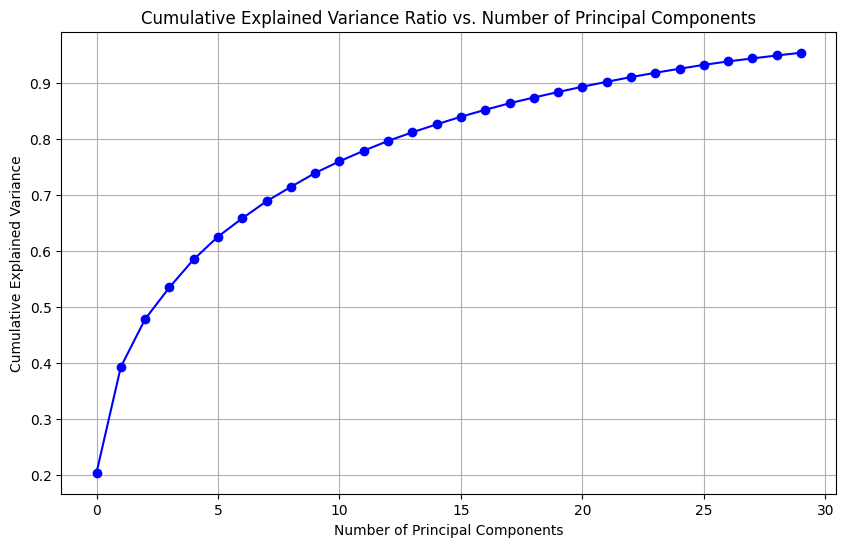

In [ ]:
#plot expained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
#Choose the no. of components
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 30


In [ ]:
#reapplying PCA
pca_final = PCA(n_components=n_components)
X_train_pca_final = pca_final.fit_transform(X_train_scaled)
X_test_pca_final = pca_final.transform(X_test_scaled)
X_pca_final = pca_final.fit_transform(X_scaled)
print(X_pca_final.shape)

(208, 30)


In [ ]:
print("PCA train data shape",X_train_pca_final.shape)
print("PCA test data shape",X_test_pca_final.shape)

PCA train data shape (187, 30)
PCA test data shape (21, 30)


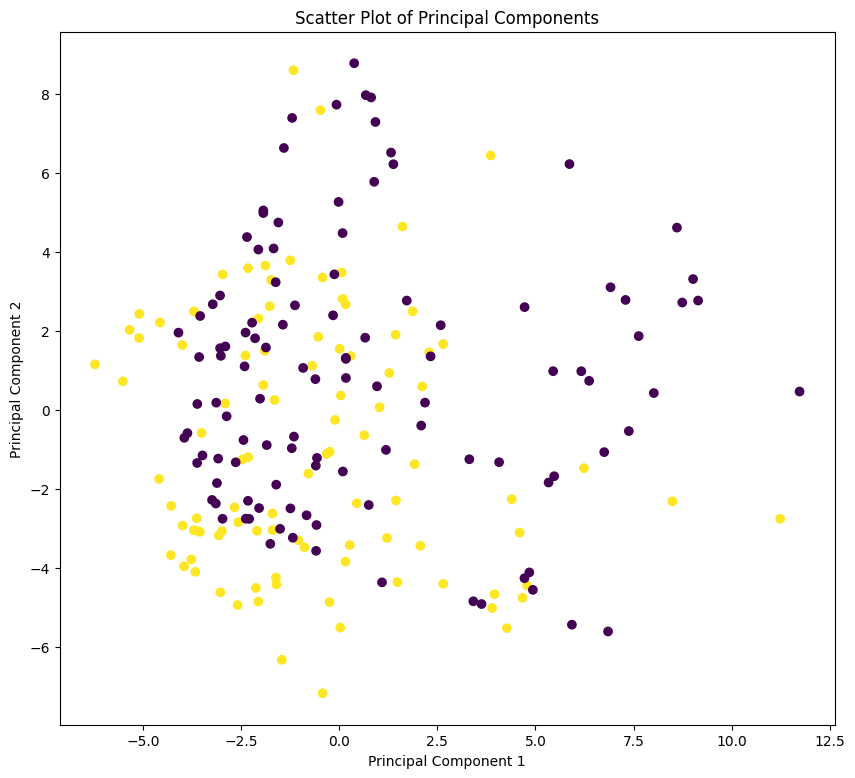

In [ ]:
plt.figure(figsize=(10,9))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['target'] = y

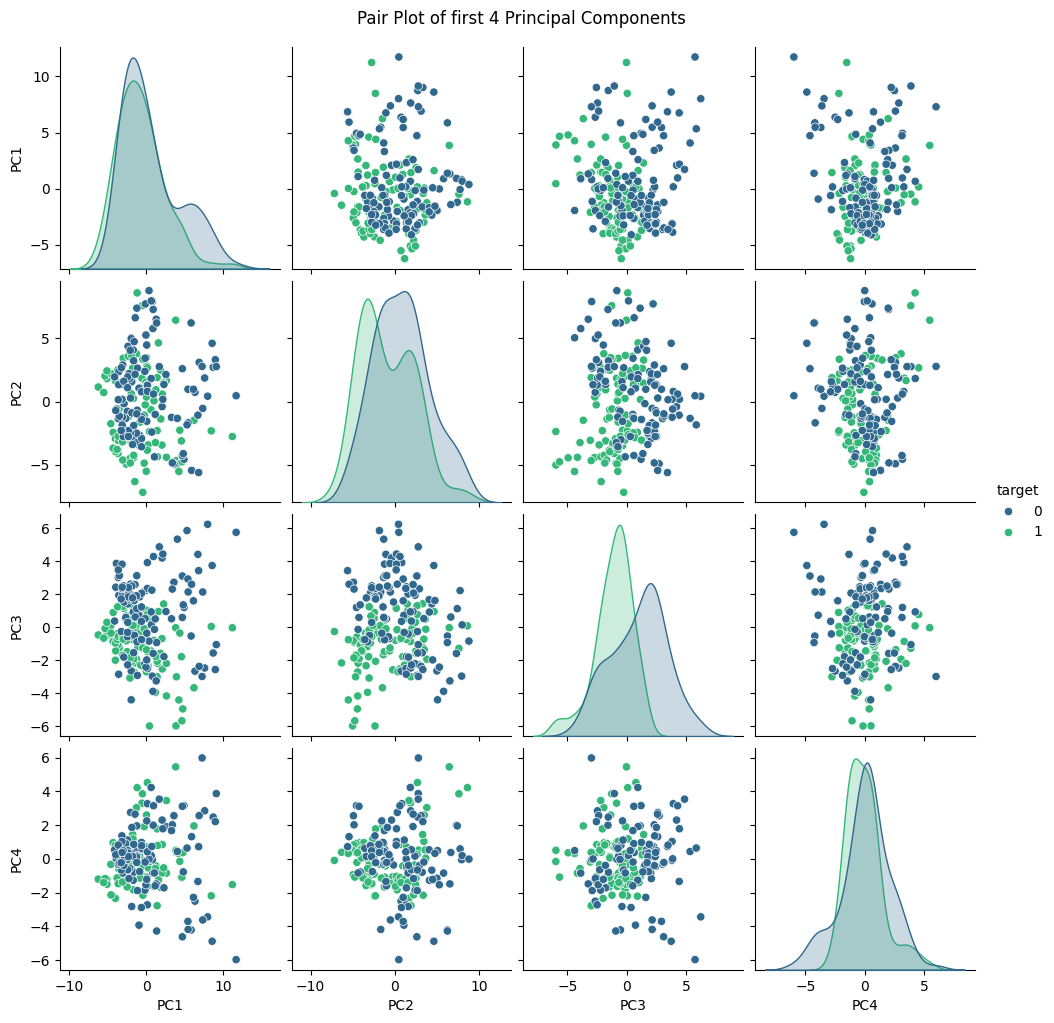

In [ ]:
sns.pairplot(pca_df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of first 4 Principal Components',y=1.02)
plt.show()

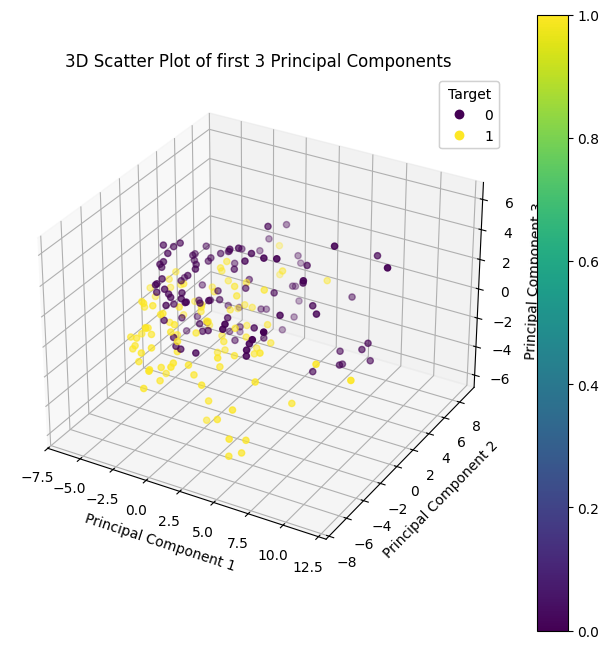

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of first 3 Principal Components')
plt.colorbar(scatter)
#create a legend
legend = ax.legend(*scatter.legend_elements(), title='Target')
ax.add_artist(legend)
plt.show()

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']) # Include 'PC7' in the column names
pca_df['target'] = y

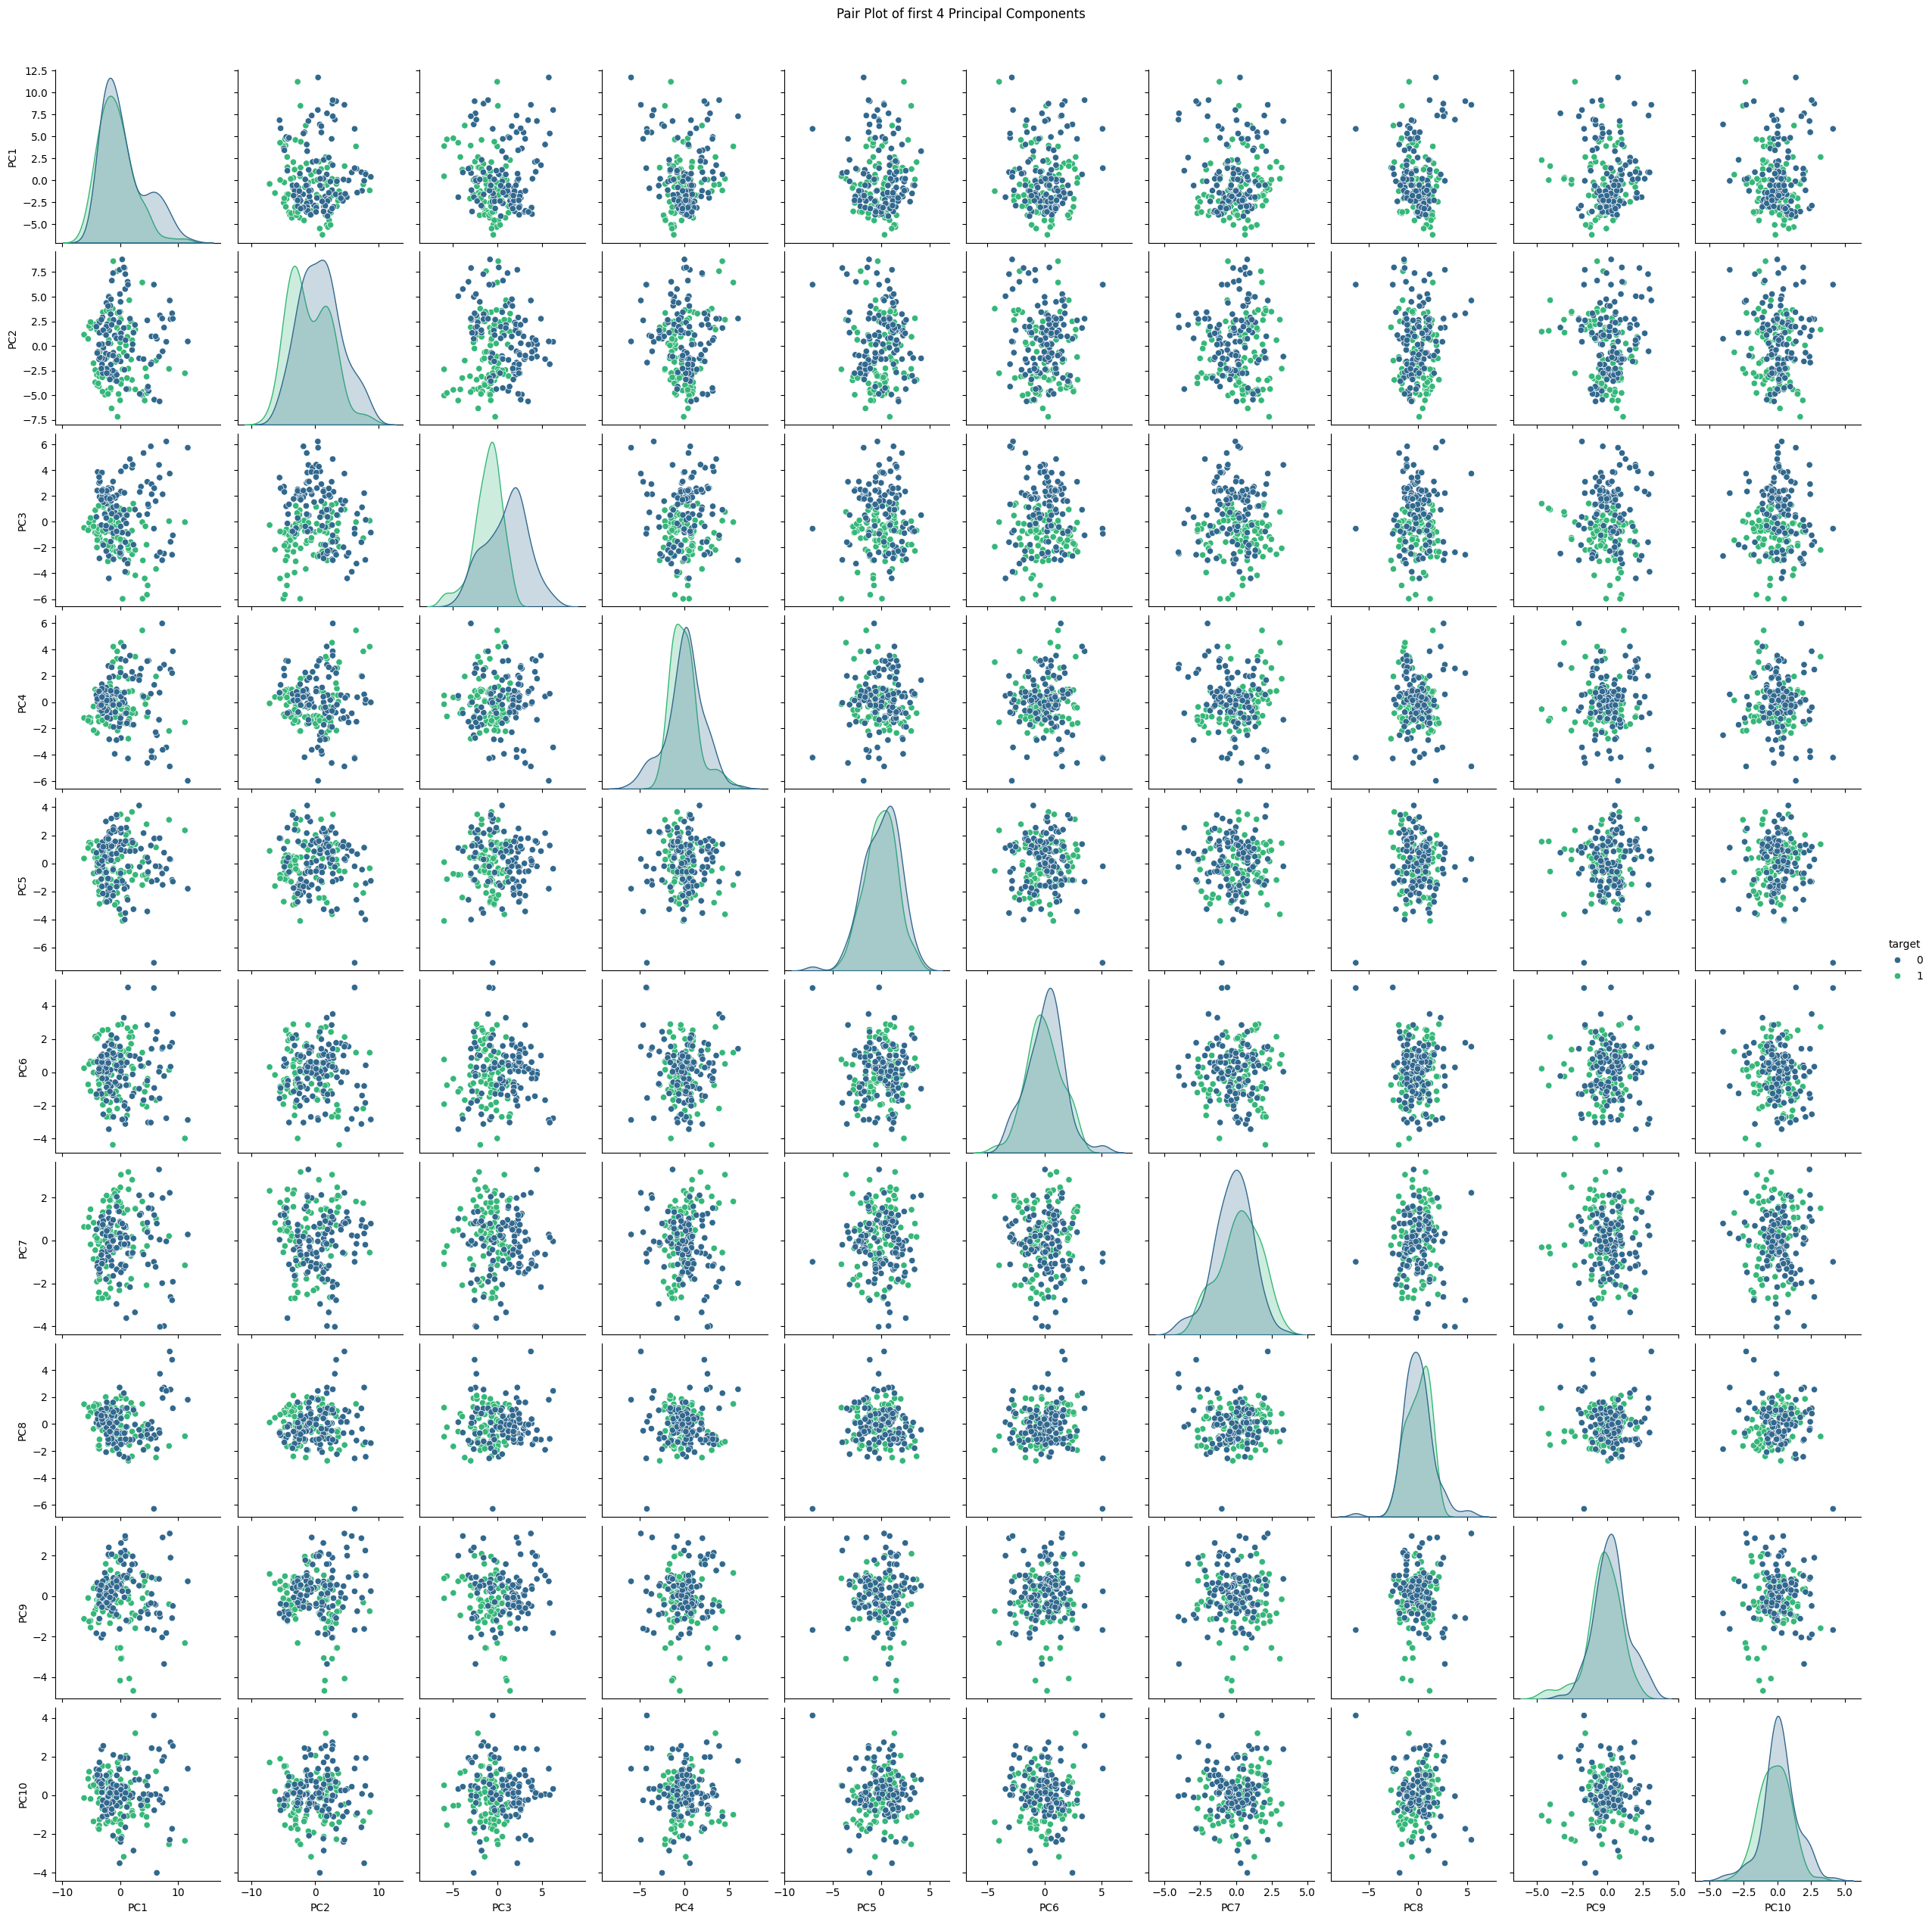

In [ ]:
sns.pairplot(pca_df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of first 4 Principal Components',y=1.02)
plt.show()

In [ ]:
sonar_data.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [ ]:
print("Skewnwss for each column: ")
for col in sonar_data.columns:

    print(col , sonar_data[col].skew())

Skewnwss for each column: 
0 2.1310884036179263
1 2.1556436669002847
2 2.6525178027721217
3 3.4016974370591417
4 2.018140508448359
5 1.2481657456456892
6 0.9708203074544366
7 1.481106640375856
8 1.6338699131287824
9 1.2812584154071602
10 0.9878128779952564
11 0.5886807806025769
12 0.7365842949556034
13 1.022369168524951
14 0.7639643127441458
15 0.6946708068184216
16 0.6544799912965897
17 0.5258451140663591
18 0.2831823484291812
19 -0.08533138360165297
20 -0.2527412170134073
21 -0.39228941499361286
22 -0.5943498637949105
23 -0.6918610071124024
24 -0.7889086971703967
25 -0.6715801459985935
26 -0.6278429273258318
27 -0.6154465982408337
28 -0.4420069524297421
29 -0.1323897889641462
30 0.2597970958332023
31 0.31341978888919564
32 0.423863709676594
33 0.5632955277781282
34 0.5916537771446705
35 0.619867866356787
36 0.676994060446236
37 1.0333664958915105
38 0.908835142088458
39 0.8612796836557962
40 0.8635260724515671
41 0.8601098037577954
42 0.9093169683561573
43 1.235086246369272
44 1.3668

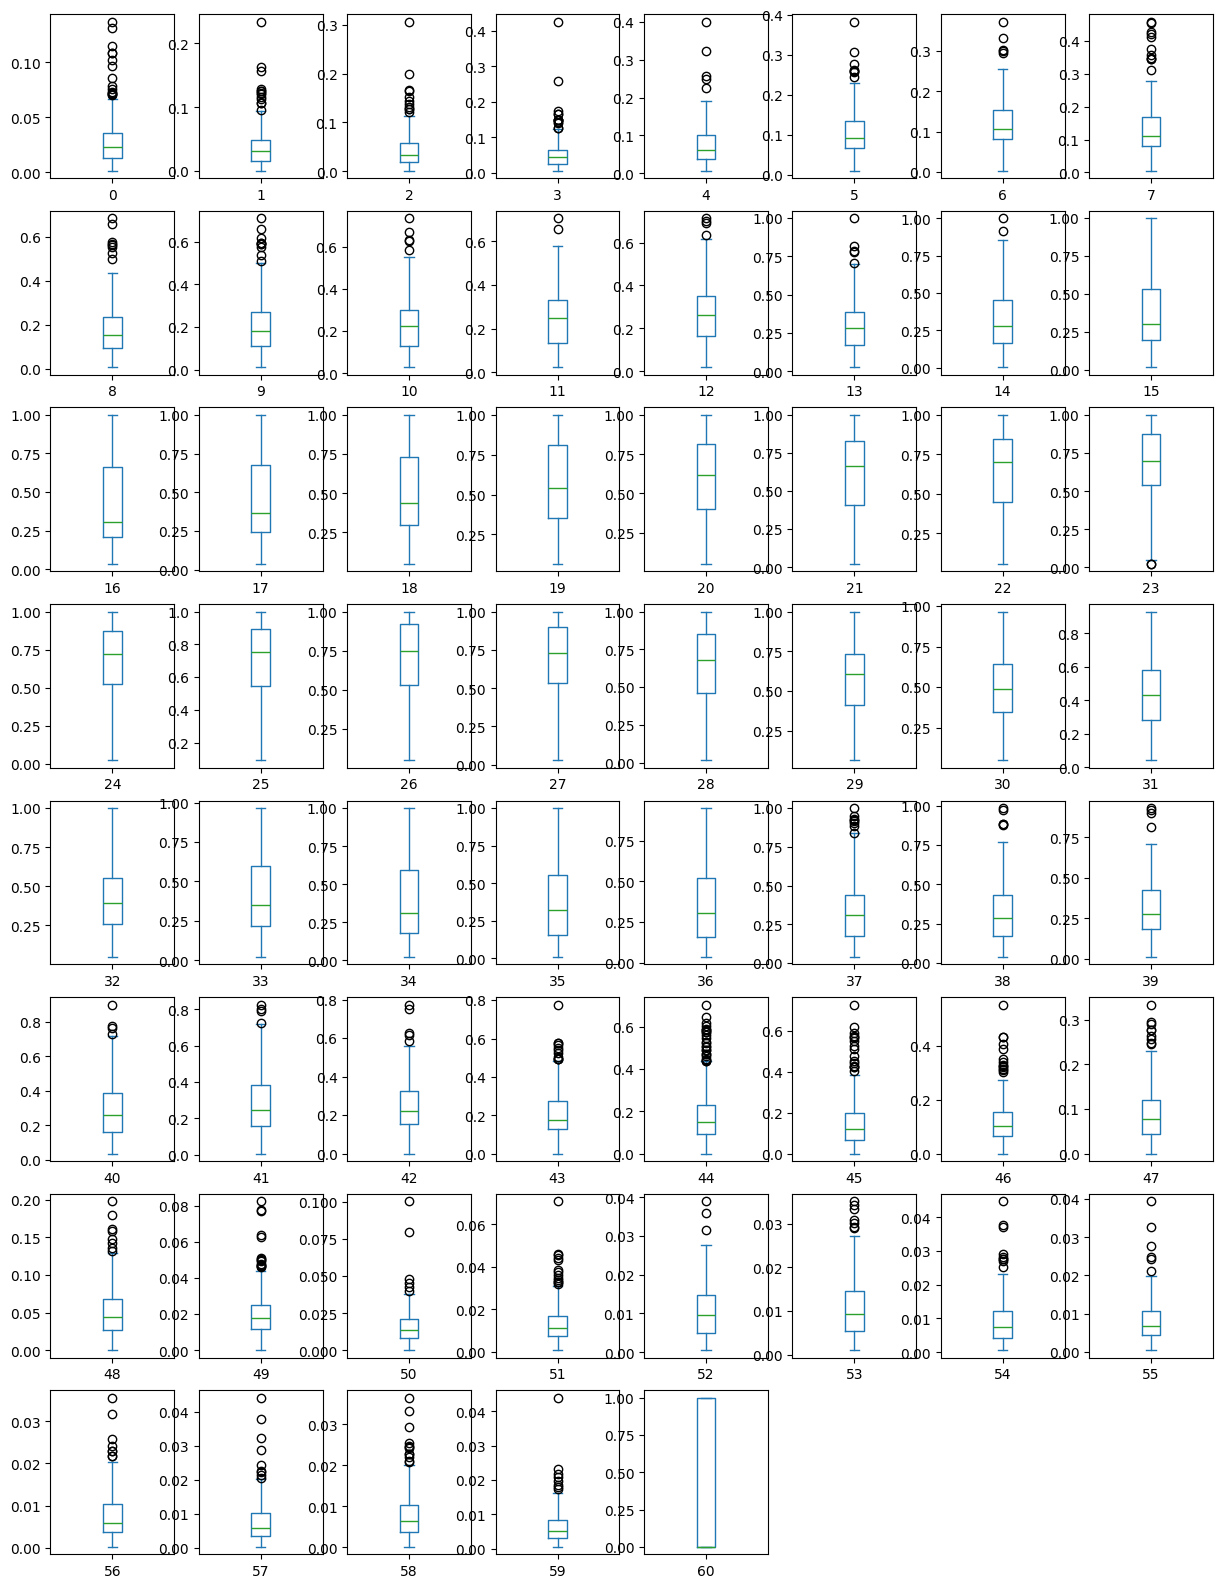

In [ ]:
sonar_data.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(15,20))
plt.show()

/tmp/ipython-input-43-3316799608.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sonar_data.skew(),color = "blue",axlabel = "Skewness")


<Axes: xlabel='Skewness', ylabel='Density'>

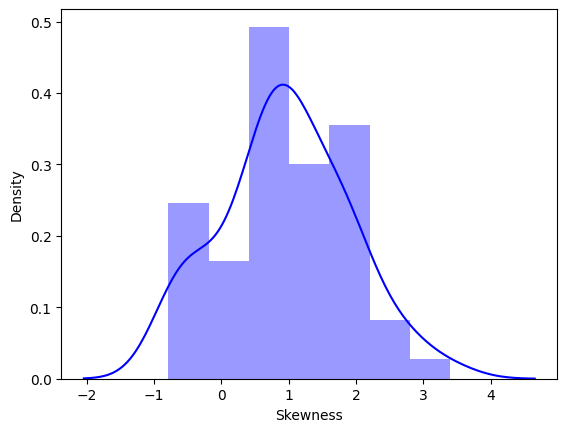

In [ ]:
#visualize skewness with distplot
sns.distplot(sonar_data.skew(),color = "blue",axlabel = "Skewness")

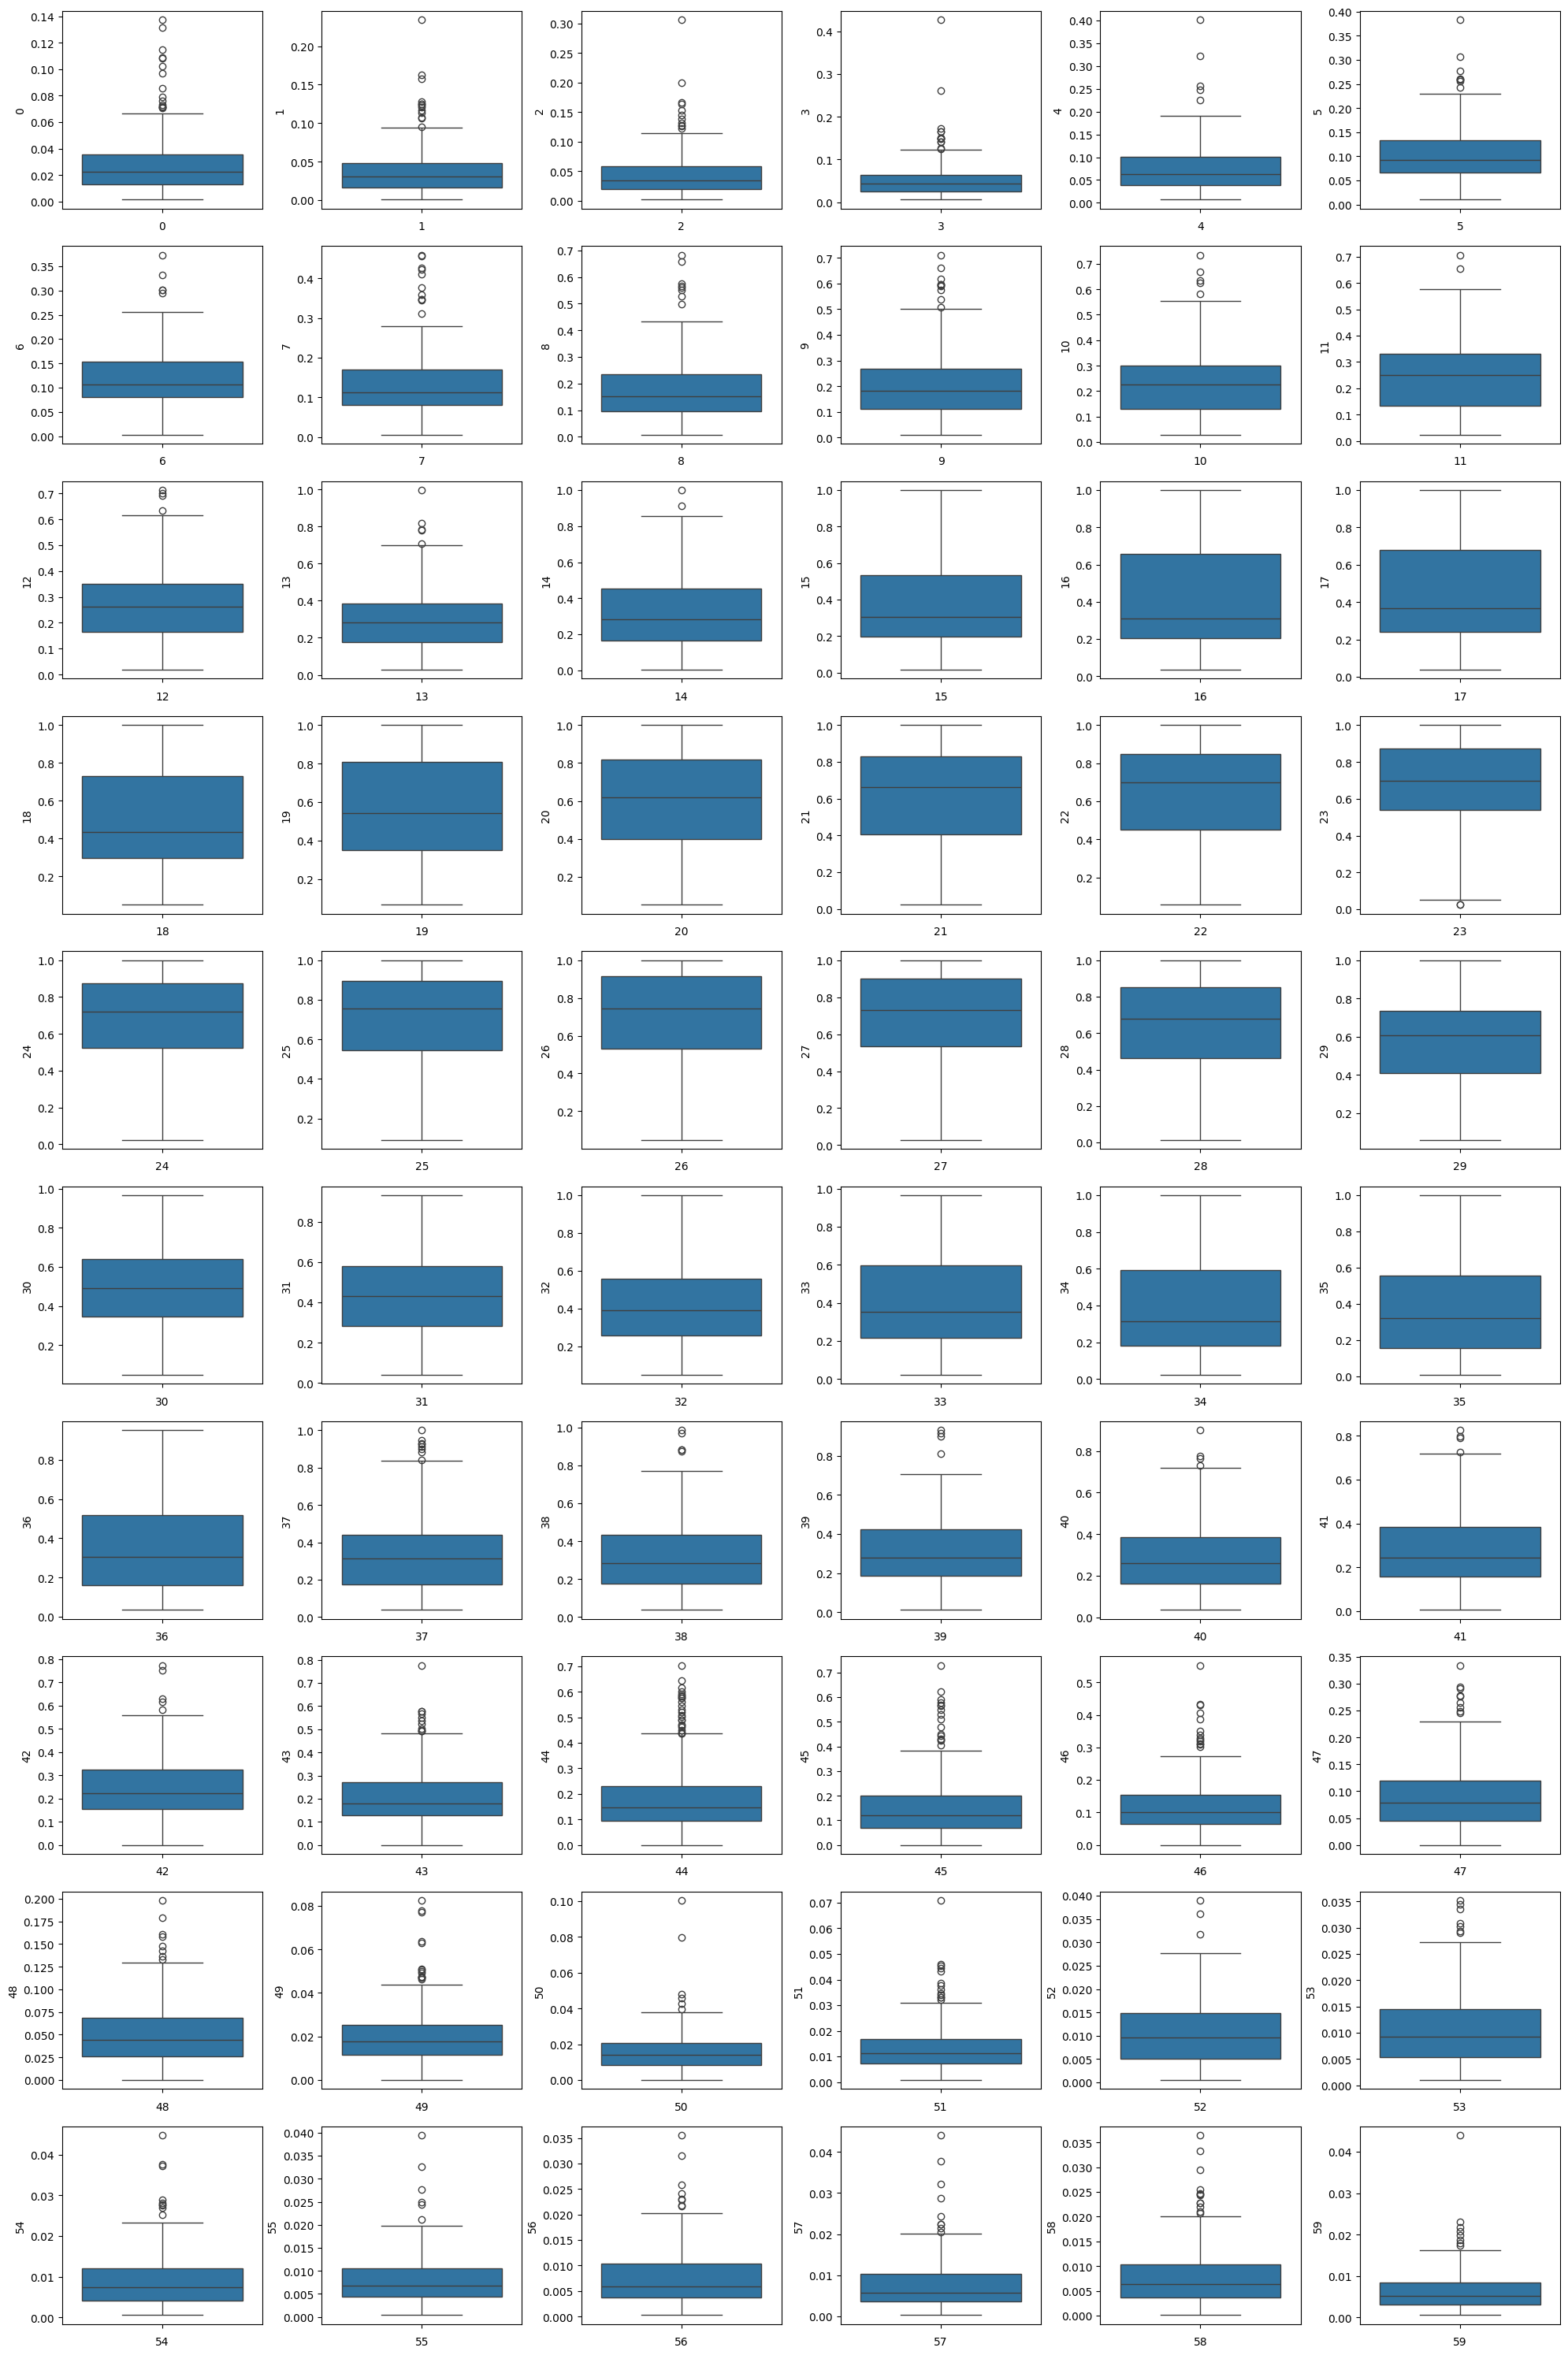

In [ ]:
#visualize boxplot for each column to check outliers
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1
for column in sonar_data:
    if plotnumber<=60:
        ax = plt.subplot(10,6,plotnumber)
        sns.boxplot(sonar_data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

TESTING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats


In [ ]:
#shaprio wilk test
stat_shaprio,p_shaprio = stats.shapiro(X_train_pca_final)
print(f"Shapiro-Wilk Test:")
print(f"  Statistic: {stat_shaprio}")
print(f"  P-value: {p_shaprio}")

Shapiro-Wilk Test:
  Statistic: 0.9007330917829115
  P-value: 3.626587241604385e-51


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5610.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
if p_shaprio > 0.05:
    print("The data is normally distributed (fail to reject the null hypothesis).")
else:
    print("The data is not normally distributed (reject the null hypothesis).")

The data is not normally distributed (reject the null hypothesis).


In [ ]:
#checking normality for principle components
print("Normality test for each component")
pca_components = [f"PC{i+1}" for i in range(X_train_pca_final.shape[1])]
for i in range(X_train_pca_final.shape[1]): # Iterate using the integer index i
    stat_shaprio, p_shaprio = stats.shapiro(X_train_pca_final[:, i]) # Access the column using integer index i
    print(f"  Component {pca_components[i]}:") # Use the string representation for printing
    print(f"    Statistic: {stat_shaprio}")
    print(f"    P-value: {p_shaprio}")

Normality test for each component
  Component PC1:
    Statistic: 0.9146237520432698
    P-value: 5.967554504391824e-09
  Component PC2:
    Statistic: 0.9689438589520475
    P-value: 0.00036007478435078955
  Component PC3:
    Statistic: 0.9934633720257877
    P-value: 0.5759665985646
  Component PC4:
    Statistic: 0.9842570947778109
    P-value: 0.03408348952181877
  Component PC5:
    Statistic: 0.9916291788667563
    P-value: 0.3536269000486447
  Component PC6:
    Statistic: 0.9963357471365514
    P-value: 0.9355904750163447
  Component PC7:
    Statistic: 0.9707419650620106
    P-value: 0.0005871910308210154
  Component PC8:
    Statistic: 0.9737711239542206
    P-value: 0.0013748401426225932
  Component PC9:
    Statistic: 0.9751922388322977
    P-value: 0.0020739581149960776
  Component PC10:
    Statistic: 0.9826995084092913
    P-value: 0.02066340772944693
  Component PC11:
    Statistic: 0.9801846520327985
    P-value: 0.00935024428278071
  Component PC12:
    Statistic: 0.

In [ ]:
stat_shaprio_pc1, p_shaprio_pc1 = stats.shapiro(X_train_pca_final[:, 0])
stat_shaprio_pc2, p_shaprio_pc2 = stats.shapiro(X_train_pca_final[:, 1])
print(f"Shapiro-Wilk Test for Component 1:")
print(f"  Statistic: {stat_shaprio_pc1}")
print(f"  P-value: {p_shaprio_pc1}")
if p_shaprio_pc1 < 0.05:
    print(f"PC 1 is likely not normally distributed.")
else:
    print(f"PC 1 appears normally distributed.")

Shapiro-Wilk Test for Component 1:
  Statistic: 0.9146237520432698
  P-value: 5.967554504391824e-09
PC 1 is likely not normally distributed.


Since the data is not normally distributed as well as some of the PCA componenets are not normally distributed as we can see from Shaprio Wilk's test. We can do some non-parametric tests

In [ ]:
def perform_mann_whitney_u_test(pca_final, target_column, alpha=0.05):
  print("\n  Mann-Whitney U Test:")
  print("Component\tU-statisyics\tp-value")
  print("-" * 40)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import warnings

# Suppress warnings for clearer output
warnings.filterwarnings("ignore")

# Load dataset (assumes last column is the label: 'R' or 'M')
df = pd.read_csv('Copy of sonar data.csv', header=None)

# Rename columns for clarity
df.columns = [f'Feature_{i+1}' for i in range(60)] + ['Label']

# Split data into two groups: rocks and mines
rock_data = df[df['Label'] == 'R']
mine_data = df[df['Label'] == 'M']

# Apply Mann-Whitney U Test to each feature
results = []
for feature in df.columns[:-1]:  # Exclude 'Label'
    stat, p = mannwhitneyu(rock_data[feature], mine_data[feature], alternative='two-sided')
    results.append({
        'Feature': feature,
        'U-statistic': stat,
        'p-value': p,
        'Significant (p < 0.05)': p < 0.05
    })

# Convert to DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display top 10 features with the lowest p-values
print(results_df.sort_values(by='p-value').head(10))

       Feature  U-statistic       p-value  Significant (p < 0.05)
10  Feature_11       2356.5  2.769640e-12                    True
11  Feature_12       2768.0  1.553788e-09                    True
9   Feature_10       2878.0  7.265821e-09                    True
48  Feature_49       2893.5  8.982416e-09                    True
8    Feature_9       2898.0  9.552946e-09                    True
47  Feature_48       3162.5  2.933241e-07                    True
12  Feature_13       3179.5  3.610152e-07                    True
50  Feature_51       3237.0  7.204933e-07                    True
46  Feature_47       3258.0  9.240620e-07                    True
51  Feature_52       3359.0  2.952319e-06                    True


welch's t-test gives us which pca components are effective in seperating mine from rocks.

In [ ]:
stats_ttest,p_ttest = stats.ttest_ind(X_train_pca_final, X_test_pca_final, equal_var=False)

In [ ]:
print(f" Independent samples T-test:")
# Iterate through the t-statistics and p-values and print them with formatting
for i in range(len(stats_ttest)):
    # Get the p-value for the current component
    current_p_value = p_ttest[i]

    print(f"  Component {i+1}: T-statistic: {stats_ttest[i]:.4f}, P-value: {current_p_value:.4f}")

    # Check if the p-value is less than 0.05 for the current component
    if current_p_value < 0.05:
        print(f"    --> Reject the null hypothesis for Component {i+1}")

# Use .any() to check if any of the p-values are less than 0.05
if (p_ttest < 0.05).any():
    print("\nReject the null hypothesis for at least one component.\n There is a significant difference between the means\n of the training and test samples for some components.")
else:
    print("\nFail to reject the null hypothesis for all components. There is no significant difference between the means of the training and test samples for any component.")

 Independent samples T-test:
  Component 1: T-statistic: -0.5999, P-value: 0.5534
  Component 2: T-statistic: 0.3264, P-value: 0.7470
  Component 3: T-statistic: 1.4849, P-value: 0.1493
  Component 4: T-statistic: -0.4335, P-value: 0.6685
  Component 5: T-statistic: -0.1268, P-value: 0.9002
  Component 6: T-statistic: -0.3508, P-value: 0.7287
  Component 7: T-statistic: -0.2862, P-value: 0.7770
  Component 8: T-statistic: -0.4219, P-value: 0.6770
  Component 9: T-statistic: -0.9375, P-value: 0.3582
  Component 10: T-statistic: -0.9918, P-value: 0.3314
  Component 11: T-statistic: -2.3333, P-value: 0.0273
    --> Reject the null hypothesis for Component 11
  Component 12: T-statistic: 0.1044, P-value: 0.9177
  Component 13: T-statistic: 1.2840, P-value: 0.2116
  Component 14: T-statistic: 0.4902, P-value: 0.6280
  Component 15: T-statistic: 0.4942, P-value: 0.6253
  Component 16: T-statistic: 1.1093, P-value: 0.2790
  Component 17: T-statistic: -0.4219, P-value: 0.6769
  Component 18: T

PCA components like PC11 PC20 are the most efficent ones in seperating mine from rocks sonar signals based on their average values along that dimension.


  quantile regression 


<Axes: xlabel='PC1', ylabel='PC2'>

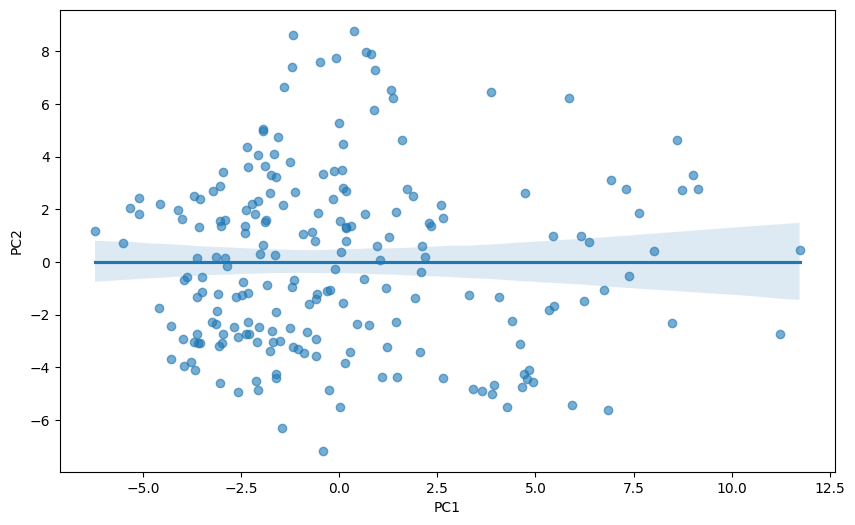

In [ ]:
#incorporating quantile regression
print("\n  quantile regression ")
#define quantile to model
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
# Select columns 'PC1' and 'PC2' using a list of column names
reg_df = pca_df[['PC1','PC2']]
plt.figure(figsize=(10, 6))
# Use scatter_kws to pass alpha to the scatter plot points
sns.regplot(x='PC1', y='PC2', data=reg_df, scatter_kws={'alpha': 0.6}, label='Data Points')


  quantile regression 

Quantile Regression Results:

Quantile = 0.1
                         QuantReg Regression Results                          
Dep. Variable:                    PC1   Pseudo R-squared:             0.003357
Model:                       QuantReg   Bandwidth:                       2.130
Method:                 Least Squares   Sparsity:                        9.269
Date:                Thu, 17 Jul 2025   No. Observations:                  208
Time:                        17:26:15   Df Residuals:                      206
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4583      0.194    -17.860      0.000      -3.840      -3.076
PC2            0.0817      0.041      2.013      0.045       0.002       0.162

Quantile = 0.25
                         QuantReg Regression

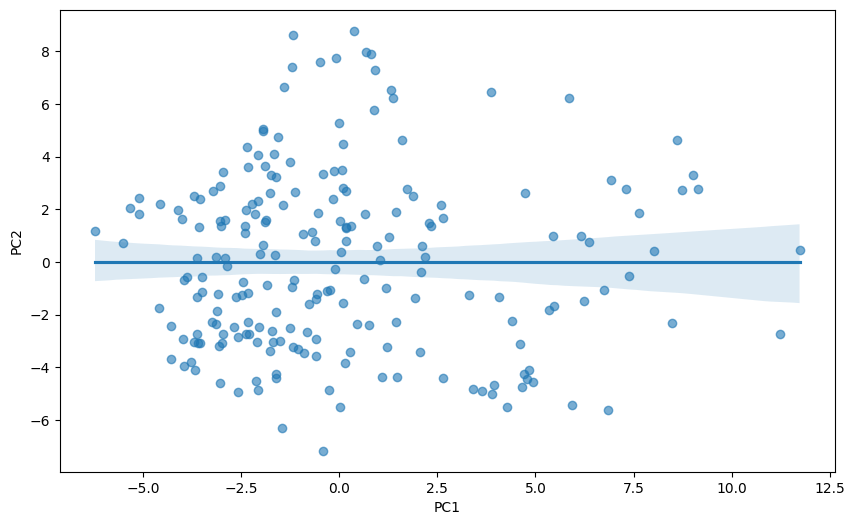

In [ ]:
#incorporating quantile regression
print("\n  quantile regression ")
#define quantile to model
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
# Select columns 'PC1' and 'PC2' using a list of column names
reg_df = pca_df[['PC1','PC2']]
plt.figure(figsize=(10, 6))
# Use scatter_kws to pass alpha to the scatter plot points
sns.regplot(x='PC1', y='PC2', data=reg_df, scatter_kws={'alpha': 0.6}, label='Data Points')

# Import the necessary module for quantile regression
import statsmodels.formula.api as smf

# Iterate through the list of quantiles and fit the model for each one
print(f"\nQuantile Regression Results:")
for q in quantiles:
    mod = smf.quantreg('PC1 ~ PC2', reg_df)
    res = mod.fit(q=q) # Fit for the current single quantile 'q'
    print(f"\nQuantile = {q}")
    print(res.summary())

plt.show() # Show the scatter plot after fitting



Quantile Regression Results:

Quantile = 0.1
                         QuantReg Regression Results                          
Dep. Variable:                    PC1   Pseudo R-squared:             0.003357
Model:                       QuantReg   Bandwidth:                       2.130
Method:                 Least Squares   Sparsity:                        9.269
Date:                Thu, 17 Jul 2025   No. Observations:                  208
Time:                        17:26:15   Df Residuals:                      206
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4583      0.194    -17.860      0.000      -3.840      -3.076
PC2            0.0817      0.041      2.013      0.045       0.002       0.162

Quantile = 0.25
                         QuantReg Regression Results                

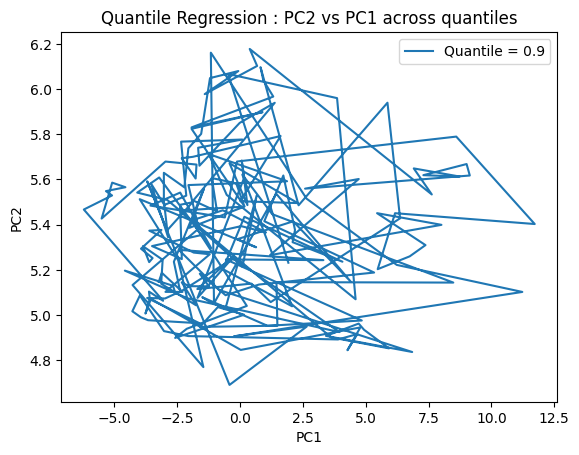

In [ ]:
# Iterate through the list of quantiles and fit the model for each one
print(f"\nQuantile Regression Results:")
for q in quantiles:
    mod = smf.quantreg('PC1 ~ PC2', reg_df)
    res = mod.fit(q=q) # Fit for the current single quantile 'q'
    print(f"\nQuantile = {q}")
    print(res.summary())

# When plotting, pass the entire reg_df DataFrame to res.predict
plt.plot(reg_df['PC1'], res.predict(reg_df), label=f'Quantile = {q}')
plt.title('Quantile Regression : PC2 vs PC1 across quantiles')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
print("\n  Detailed summary for median quantile")
mod_median = smf.quantreg('PC1 ~ PC2', reg_df)
res_median = mod_median.fit(q=0.5) # Fit for the current single quantile 'q
print(res_median.summary())


  Detailed summary for median quantile
                         QuantReg Regression Results                          
Dep. Variable:                    PC1   Pseudo R-squared:             0.003418
Model:                       QuantReg   Bandwidth:                       2.470
Method:                 Least Squares   Sparsity:                        7.643
Date:                Thu, 17 Jul 2025   No. Observations:                  208
Time:                        17:26:15   Df Residuals:                      206
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7492      0.265     -2.827      0.005      -1.272      -0.227
PC2            0.0881      0.079      1.119      0.264      -0.067       0.243


MODELS

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.fit(X_train_pca_final, Y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train_pca_final)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)
#accuracy on test data
X_test_prediction = model.predict(X_test_pca_final)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on training data :  0.8770053475935828
Accuracy on test data :  0.7619047619047619


In [ ]:
model.score(X_test_pca_final, Y_test)

0.7619047619047619

In [ ]:
accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Accuracy of the Logistic Regression: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy of the Logistic Regression: 0.7619

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



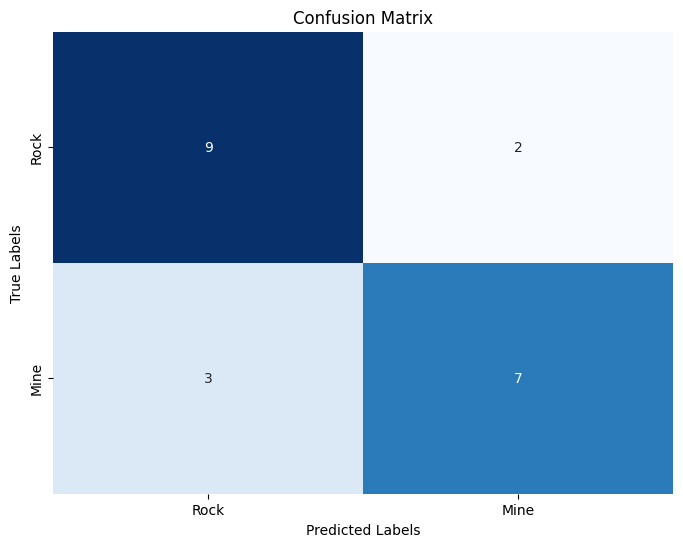

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Rock','Mine'],yticklabels=['Rock','Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_pca_final, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#make predictions on the test set
y_pred = random_forest.predict(X_test_pca_final)


In [ ]:
y_train = random_forest.predict(X_train_pca_final)

MODEL EVALUATION

In [ ]:
random_forest.score(X_test_pca_final, Y_test)

0.8571428571428571

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Accuracy of the Random Forest Classifier: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.70      0.82        10

    accuracy                           0.86        21
   macro avg       0.89      0.85      0.85        21
weighted avg       0.89      0.86      0.85        21



In [ ]:
test_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8571428571428571


In [ ]:
train_data_accuracy = accuracy_score(Y_train, y_train)
print('Accuracy on training data : ', train_data_accuracy)

Accuracy on training data :  1.0


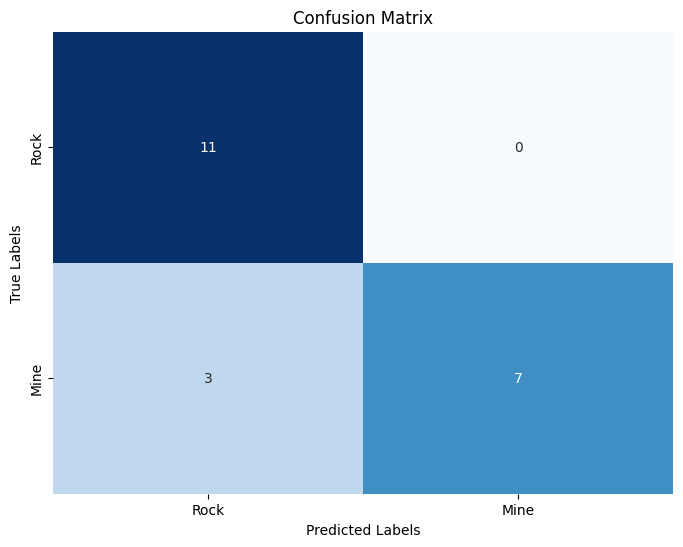

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Rock','Mine'],yticklabels=['Rock','Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

#calculating other metrices based on the confusion matrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision_mine = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_mine = tp / (tp + fn) if (tp + fn) > 0 else 0
precision_rock = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_rock = tn / (tn + fp) if (tn + fp) > 0 else 0


In [ ]:
print(f"Accuracy of the Random Forest Classifier: {accuracy:.4f}")
print(f"Precision (Mine): {precision_mine:.4f}")
print(f"Recall (Mine): {recall_mine:.4f}")
print(f"Precision (Rock): {precision_rock:.4f}")
print(f"Recall (Rock): {recall_rock:.4f}")

Accuracy of the Random Forest Classifier: 0.8571
Precision (Mine): 1.0000
Recall (Mine): 0.7000
Precision (Rock): 0.7857
Recall (Rock): 1.0000


In [ ]:
#feature importance
feature_importance = random_forest.feature_importances_
# Get the feature names from the PCA transformed data
feature_names = [f"PC{i+1}" for i in range(X_train_pca_final.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance :")
print(importance_df.head(10))


Feature Importance :
   Feature  Importance
2      PC3    0.195454
1      PC2    0.076432
8      PC9    0.046163
6      PC7    0.043225
0      PC1    0.041863
7      PC8    0.037511
12    PC13    0.033724
3      PC4    0.032629
16    PC17    0.030163
21    PC22    0.029337


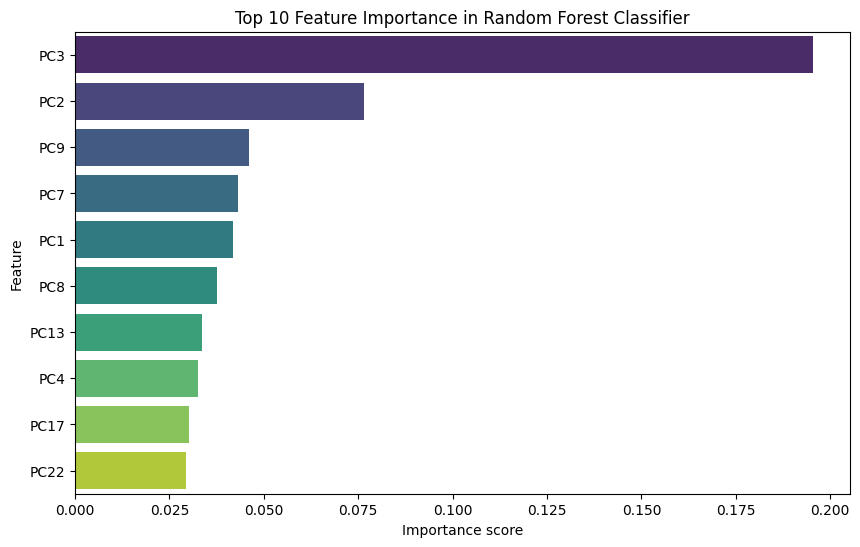

In [ ]:
#visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance in Random Forest Classifier')
plt.xlabel('Importance score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

EVALUATE ALGORITMS: BASELINE

We don't know what algoritms will do well on this datset. Intution suggests distance based algorithms like KNN and SVM may do well. Let's design our test harness. We will use 10 fold cross-validation. The dataset is not too small and this is a good standard test harness configuration. We wlii evaluate algorithms using the accuracy matrix .

In [ ]:
#twst options and evaluation mertic
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# spot check algorithms
models = []

# Import necessary modules for the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

the algorithms all use default tunning parameters. Let's compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithms as we calculate it and collect the results for use later

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []
for name, model in models:
    # Removed 'model_selection.' prefix as KFold is directly imported
    # Added shuffle=True to allow random_state to have an effect
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    # Removed 'model_selection.' prefix as cross_val_score is directly imported
    cv_results = cross_val_score(model, X_train_pca_final, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.754386 (0.087963)
KNN: 0.801170 (0.097443)
NB: 0.716667 (0.075260)
SVM: 0.812573 (0.065152)
RF: 0.785673 (0.104120)


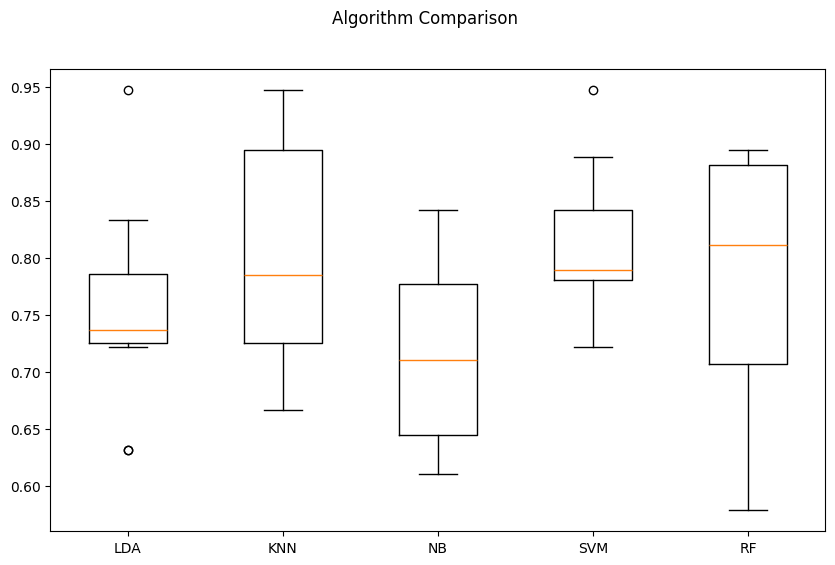

In [ ]:
#compare algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#tunning of SVM
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train_pca_final)
rescaledX = scaler.transform(X_train_pca_final)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802924 using {'C': 2.0, 'kernel': 'rbf'}
0.738012 (0.075823) with: {'C': 0.1, 'kernel': 'linear'}
0.534503 (0.126685) with: {'C': 0.1, 'kernel': 'poly'}
0.534503 (0.126685) with: {'C': 0.1, 'kernel': 'rbf'}
0.555848 (0.136875) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.748538 (0.088843) with: {'C': 0.3, 'kernel': 'linear'}
0.528947 (0.185065) with: {'C': 0.3, 'kernel': 'poly'}
0.647368 (0.137366) with: {'C': 0.3, 'kernel': 'rbf'}
0.722222 (0.098768) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.737427 (0.087961) with: {'C': 0.5, 'kernel': 'linear'}
0.588304 (0.167785) with: {'C': 0.5, 'kernel': 'poly'}
0.707602 (0.110703) with: {'C': 0.5, 'kernel': 'rbf'}
0.733333 (0.086481) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.737135 (0.092459) with: {'C': 0.7, 'kernel': 'linear'}
0.609649 (0.148602) with: {'C': 0.7, 'kernel': 'poly'}
0.728363 (0.087343) with: {'C': 0.7, 'kernel': 'rbf'}
0.716959 (0.080394) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.737719 (0.093009) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
scaler = StandardScaler().fit(X_train_pca_final)
rescaledX = scaler.transform(X_train_pca_final)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]

param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.775731 using {'n_neighbors': 3}
0.743567 (0.077317) with: {'n_neighbors': 1}
0.775731 (0.087388) with: {'n_neighbors': 3}
0.743860 (0.095415) with: {'n_neighbors': 5}
0.733918 (0.103304) with: {'n_neighbors': 7}
0.759357 (0.099304) with: {'n_neighbors': 9}
0.738304 (0.100877) with: {'n_neighbors': 11}
0.722515 (0.101866) with: {'n_neighbors': 13}
0.732749 (0.095379) with: {'n_neighbors': 15}
0.733626 (0.098451) with: {'n_neighbors': 17}
0.743567 (0.086680) with: {'n_neighbors': 19}
0.733333 (0.092324) with: {'n_neighbors': 21}


In [ ]:
#prepare the model
scaler = StandardScaler().fit(X_train_pca_final)
rescaledX = scaler.transform(X_train_pca_final)
model = SVC(C=2.0, kernel='rbf')
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_test_pca_final)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9523809523809523
[[11  0]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



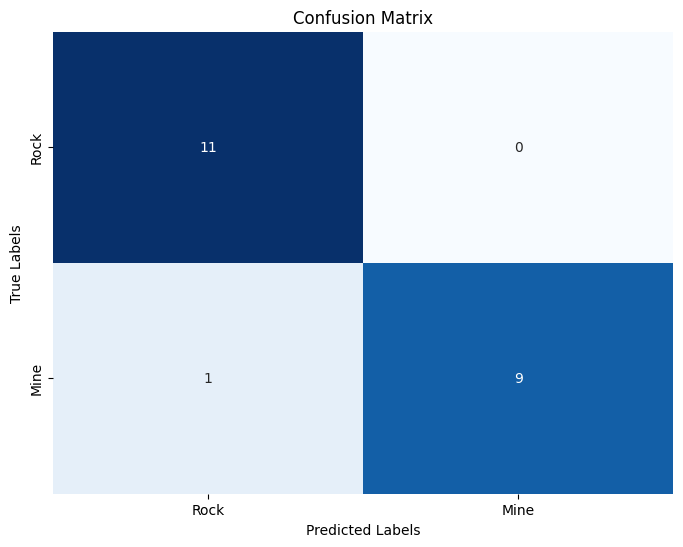

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Rock','Mine'],yticklabels=['Rock','Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#calculating other metrices based on the confusion matrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision_mine = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_mine = tp / (tp + fn) if (tp + fn) > 0 else 0
precision_rock = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_rock = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"Accuracy of the SVM: {accuracy:.4f}")
print(f"Precision (Mine): {precision_mine:.4f}")
print(f"Recall (Mine): {recall_mine:.4f}")
print(f"Precision (Rock): {precision_rock:.4f}")
print(f"Recall (Rock): {recall_rock:.4f}")

Accuracy of the SVM: 0.9524
Precision (Mine): 1.0000
Recall (Mine): 0.9000
Precision (Rock): 0.9167
Recall (Rock): 1.0000


PermutationExplainer explainer: 22it [00:23,  1.57s/it]



SHAP Summary Plot for SVM:


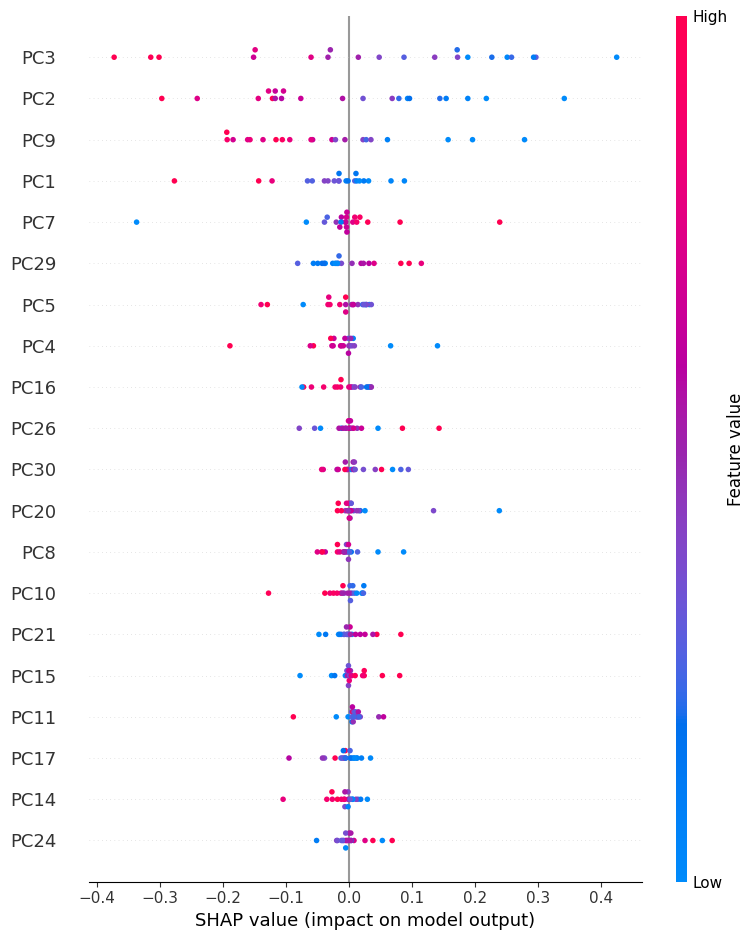


SHAP Dependence Plot for PC1 (Index 0):


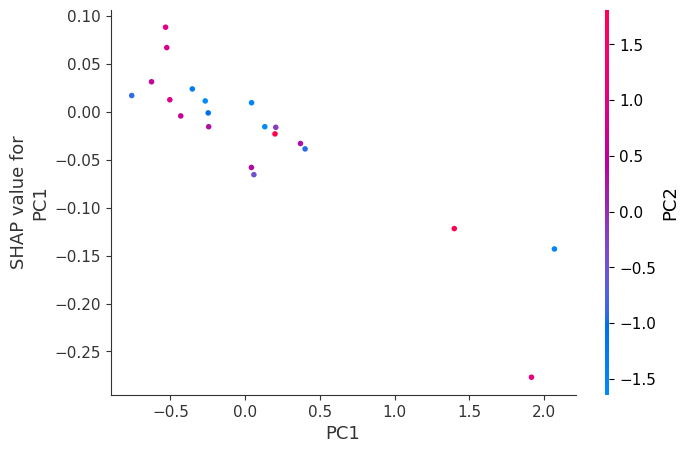

In [ ]:
#feature importance - Using SHAP for SVM as it doesn't have feature_importances_

# The trained SVC model instance is 'model' from the previous cell

# Recreate the explainer for the trained SVC model
# Note: For non-tree models, KernelExplainer or Explainer with a background dataset is often used
# Given the context of previous SHAP usage, let's try the default Explainer first.
# If this is slow or inaccurate, consider switching to KernelExplainer.
import shap
# Assuming the data used for training was scaled
# Use the rescaled training data as the background dataset for Explainer
explainer_svm = shap.Explainer(model.predict, rescaledX) # Use the trained SVM model instance and scaled training data

# Calculate SHAP values for the test set predictions
# Use the scaled test data for predictions
shap_values_svm = explainer_svm(rescaledValidationX)

# Get the number of features from the PCA transformed data
n_features = X_train_pca_final.shape[1]

# Generate a list of feature names (e.g., 'PC1', 'PC2', ...)
feature_names = [f"PC{i+1}" for i in range(n_features)]

# Visualize the SHAP values
print("\nSHAP Summary Plot for SVM:")
shap.summary_plot(shap_values_svm, rescaledValidationX, feature_names=feature_names)

# You can also visualize the dependence of a specific feature (e.g., PC1)
# Make sure the index corresponds to the correct feature in feature_names
print("\nSHAP Dependence Plot for PC1 (Index 0):")
# Access the SHAP values for the first output (index 0) of the model if it's multi-output
# For binary classification, shap_values_svm might be a list or a single array. Adjust indexing accordingly.
# Assuming shap_values_svm is a single Explainer object result containing .values
shap.dependence_plot(0, shap_values_svm.values, rescaledValidationX, feature_names=feature_names)

# If you encounter issues with the Explainer for SVM, consider using KernelExplainer
# from shap import KernelExplainer
# explainer_svm = KernelExplainer(model.predict_proba, shap.sample(rescaledX, 50)) # Use a subset of training data for background
# shap_values_svm = explainer_svm.shap_values(rescaledValidationX)
# shap.summary_plot(shap_values_svm[0], rescaledValidationX, feature_names=feature_names) # For class 0
# shap.dependence_plot(0, shap_values_svm[0], rescaledValidationX, feature_names=feature_names) # For class 0, feature 0

In [ ]:
#explain the models predictions using SHAP
!pip install shap
import shap
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_train_pca_final)

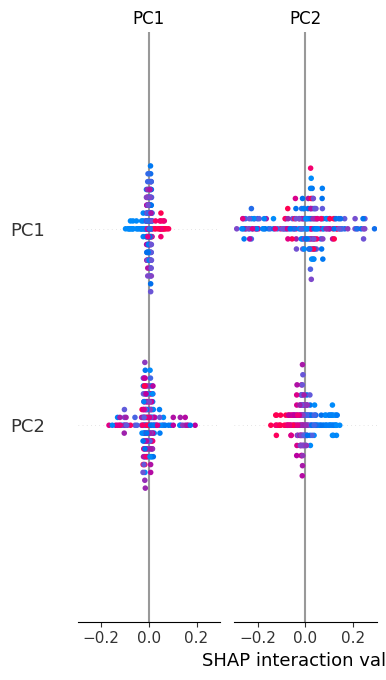

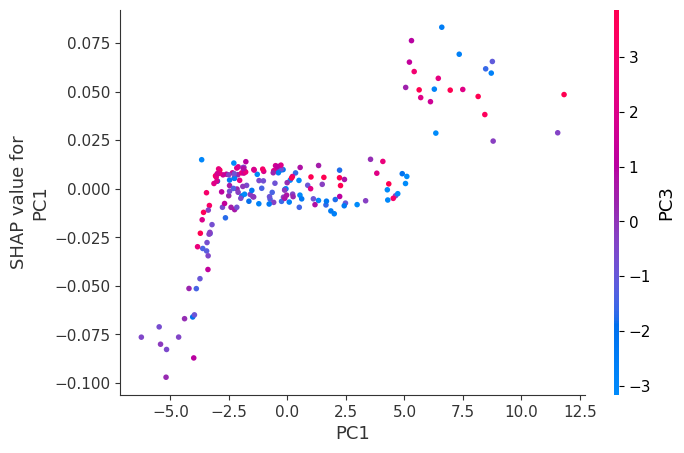

In [ ]:

explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_train_pca_final)

# Get the number of features from the PCA transformed data
n_features = X_train_pca_final.shape[1]

# Generate a list of feature names (e.g., 'PC1', 'PC2', ...)
feature_names = [f"PC{i+1}" for i in range(n_features)]

#visualize the SHAP values
shap.summary_plot(shap_values, X_train_pca_final, feature_names=feature_names) # Add feature_names
shap.dependence_plot("PC1", shap_values[:, :, 0], X_train_pca_final, feature_names=feature_names)


In [ ]:
#create a LIME explainer
!pip install lime
import lime
# Corrected import for LimeTabularExplainer
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_pca_final),
    feature_names=feature_names,
    class_names=['Rock', 'Mine'],
    mode='classification'
)
#explain a single prediction
instance_to_explain = 0
# Corrected the index used for explaining the instance. It was previously 'i'
# which was the index from the previous loop. We want to explain a specific instance,
# so using 'instance_to_explain' is more appropriate.
exp = explainer.explain_instance(
    data_row=X_train_pca_final[instance_to_explain],
    predict_fn=random_forest.predict_proba
)
#visualize
# The variable name for the explanation object is 'exp', not 'explanation'.
exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8ff3225dd296849222aa8c70be97a9e4aeaf0a60698a237c542b3dafcc4ebaf9
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


MAKING A PREDICTIVE SYSTEM

In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Refit the scaler on the original training data
scaler = StandardScaler().fit(X_train)

# Scale the input data using the scaler fitted on the original training data
input_data_scaled = scaler.transform(input_data_reshaped)

# Apply PCA transformation using the same pca_final object fitted on the scaled
# training data
input_data_pca = pca_final.transform(input_data_scaled)

prediction = model.predict(input_data_pca)
print(prediction)

if (prediction[0] == 0):
  print('The object is a Rock')
else:
  print('The object is a mine')

[0]
The object is a Rock


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import warnings

# Suppress warnings for clearer output
warnings.filterwarnings("ignore")

# Assuming X_train_pca_final contains your PCA-transformed training data
# and Y_train contains the corresponding labels (0 for Rock, 1 for Mine)

# Create a DataFrame from the PCA-transformed data for easier handling
pca_train_df = pd.DataFrame(X_train_pca_final)
pca_train_df['label'] = Y_train.values # Add the labels to the DataFrame

# Separate the PCA data based on the labels
pca_rock_data = pca_train_df[pca_train_df['label'] == 0]
pca_mine_data = pca_train_df[pca_train_df['label'] == 1]

# Apply Mann-Whitney U Test to each principal component
pca_results = []
for component in pca_train_df.columns[:-1]: # Exclude the 'label' column
    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(pca_rock_data[component], pca_mine_data[component], alternative='two-sided')
    pca_results.append({
        'Principal Component': f'PC{component + 1}', # Use PC names
        'U-statistic': stat,
        'p-value': p,
        'Significant (p < 0.05)': p < 0.05
    })

# Convert to DataFrame for easier viewing
pca_results_df = pd.DataFrame(pca_results)

# Display the results, sorted by p-value
print("Mann-Whitney U Test Results for Principal Components:")
print(pca_results_df.sort_values(by='p-value'))

Mann-Whitney U Test Results for Principal Components:
   Principal Component  U-statistic       p-value  Significant (p < 0.05)
2                  PC3       6793.0  3.693850e-11                    True
1                  PC2       5701.0  2.541663e-04                    True
8                  PC9       5403.0  4.360270e-03                    True
0                  PC1       5009.0  7.448175e-02                   False
6                  PC7       3734.0  9.548042e-02                   False
13                PC14       4920.0  1.229343e-01                   False
12                PC13       3857.0  1.822014e-01                   False
3                  PC4       4839.0  1.857778e-01                   False
28                PC29       3887.0  2.102973e-01                   False
27                PC28       4794.0  2.296411e-01                   False
9                 PC10       4788.0  2.360047e-01                   False
7                  PC8       4787.0  2.370774e-01         

Based on the Mann-Whitney U Test Results for Principal Components, we can conclude the following:
Conclusion: Principal Components PC3, PC2, and PC9 show statistically significant differences between the two groups being compared (likely "Rock" and "Mine" in the context of sonar data), indicating they are strong discriminators. The remaining principal components do not show a statistically significant difference.
Here's a detailed breakdown of the interpretation:
 * Purpose of Mann-Whitney U Test:
   * The Mann-Whitney U test is a non-parametric test used to determine if there is a statistically significant difference between the medians of two independent groups. In this context, it's likely being used to see if the distribution of values for each principal component differs significantly between the "Rock" and "Mine" classes.
 * Interpreting the Columns:
   * Principal Component: The name of the principal component (e.g., PC3, PC2, PC9).
   * U-statistic: The value of the Mann-Whitney U statistic.
   * p-value: The probability of observing a U-statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis (no difference between the groups) is true.
   * Significant (p < 0.05): This column directly indicates whether the p-value is less than 0.05 (the common significance level, or alpha).
     * True: If p < 0.05, it means the difference in the distribution of that principal component between the two groups is statistically significant. We reject the null hypothesis, concluding there is a significant difference.
     * False: If p >= 0.05, it means the difference is not statistically significant. We fail to reject the null hypothesis, implying no strong evidence of a difference.
 * Specific Findings:
   * Statistically Significant Principal Components:
     * PC3 (p-value: 3.693850e-11, True): Extremely low p-value. This indicates a very strong statistically significant difference in PC3 values between the two groups. PC3 is a highly effective differentiator.
     * PC2 (p-value: 2.541663e-04, True): Very low p-value, also indicating a strong statistically significant difference. PC2 is another important differentiator.
     * PC9 (p-value: 4.360270e-03, True): Low p-value, indicating a statistically significant difference. PC9 is also a good differentiator.
   * Non-Statistically Significant Principal Components:
     * All other listed principal components (PC1, PC7, PC14, PC13, PC4, PC29, PC28, PC10, PC8, PC17, PC18, PC5, PC24, PC26, PC20, PC15, PC19, PC21, PC22, PC23, PC11, PC25, PC27, PC16, PC12, PC6, PC30) have p-values greater than or equal to 0.05. This means for these components, there is no sufficient evidence to claim a statistically significant difference in their distributions between the two groups. They are not strong individual discriminators according to this test.
Overall Implication:
The Mann-Whitney U test reinforces the idea that PC3, PC2, and PC9 are the most critical features for distinguishing between the two classes (e.g., Rock and Mine). These are the components where the values for one class are significantly different from the values for the other class. This information is crucial for feature selection or understanding which underlying patterns (represented by these PCs) are most indicative of the class.